<a href="https://colab.research.google.com/github/1002Sam/Classification-Cardiovascular-Risk-Prediction/blob/main/Classification_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Cardiovascular Risk Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -** Samadhan Tangde
##### **Team Member 2 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/1002Sam/Classification-Cardiovascular-Risk-Prediction.git

# **Problem Statement**


**The objective of this project is to develop a machine learning model that can predict whether a patient is at risk of developing coronary heart disease (CHD) within the next 10 years.** The dataset used for this project contains records of over 4,000 patients from an ongoing cardiovascular study in Framingham, Massachusetts. Each record consists of 15 attributes, including demographic, behavioral, and medical risk factors.

**The primary task is binary classification, where the target variable is "TenYearCHD," indicating whether a patient is at risk of CHD (1) or not (0).** The features include attributes such as age, sex, education level, smoking status, blood pressure measurements, cholesterol levels, and more. The dataset may also contain missing values that need to be handled appropriately.

**By building an accurate predictive model, this project aims to assist healthcare professionals in identifying individuals at higher risk of CHD, allowing for early intervention and tailored healthcare recommendations to reduce the incidence of cardiovascular diseases.**

Key objectives for the project include data preprocessing, feature engineering, model selection, hyperparameter tuning, and evaluating the model's performance using appropriate metrics. The success of this project will be measured by the model's ability to predict CHD risk with a high degree of accuracy and reliability.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [240]:
# Import Libraries
import numpy as np
import pandas as pd
from datetime import datetime as dt

# Import Data Visualisation Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import and Ignore warnings for better code readability,
import warnings
warnings.filterwarnings('ignore')

from sklearn.impute import KNNImputer
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

### Dataset Loading

In [241]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

# Read csv file
data_raw = pd.read_csv('/content/drive/MyDrive/AlmaBetter /Machine Learning/5. Capstone Project - Classification/data_cardiovascular_risk.csv')
#data_raw = pd.read_csv(path, index_col='id')

# Creating a copy of data set
clas = data_raw.copy()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [242]:
# Dataset First Look
clas

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
0        0   64        2.0   F        YES         3.0     0.0   
1        1   36        4.0   M         NO         0.0     0.0   
2        2   46        1.0   F        YES        10.0     0.0   
3        3   50        1.0   M        YES        20.0     0.0   
4        4   64        1.0   F        YES        30.0     0.0   
...    ...  ...        ...  ..        ...         ...     ...   
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    221.0  148.0   85.0    NaN   
1                   0             1         0    212.0  168.0   98.0  29.77   
2                   0             0         0    250.0  116.0   71.0  20.35   
3                   0             1         0    233.0  158.0   88.0  28.26   
4                   0             0         0    241.0  136.5   85.0  26.42   
...               ...           ...       ...      ...    ...    ...    ...   
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
0          90.0     80.0           1  
1          72.0     75.0           0  
2          88.0     94.0           0  
3          68.0     94.0           1  
4          70.0     77.0           0  
...         ...      ...         ...  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0  

[3390 rows x 17 columns]

### Dataset Rows & Columns count

In [243]:
# Dataset Rows & Columns count
print(clas.shape)

(3390, 17)


### Dataset Information

In [244]:
# Dataset Info
clas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [245]:
# Dataset Duplicate Value Count
clas.duplicated().sum()

0

#### Missing Values/Null Values

In [246]:
# Missing Values/Null Values Count
missing_data = clas.isnull().sum().sort_values(ascending = False)
print("\nMissing data:")
print(missing_data)
print('\n')
total_percentage = (missing_data.sum()/clas.shape[0])*100
print(f"The Total percentage of missing data is {round(total_percentage,2)}%")


Missing data:
glucose            304
education           87
BPMeds              44
totChol             38
cigsPerDay          22
BMI                 14
heartRate            1
id                   0
diaBP                0
sysBP                0
prevalentHyp         0
diabetes             0
age                  0
prevalentStroke      0
is_smoking           0
sex                  0
TenYearCHD           0
dtype: int64


The Total percentage of missing data is 15.04%


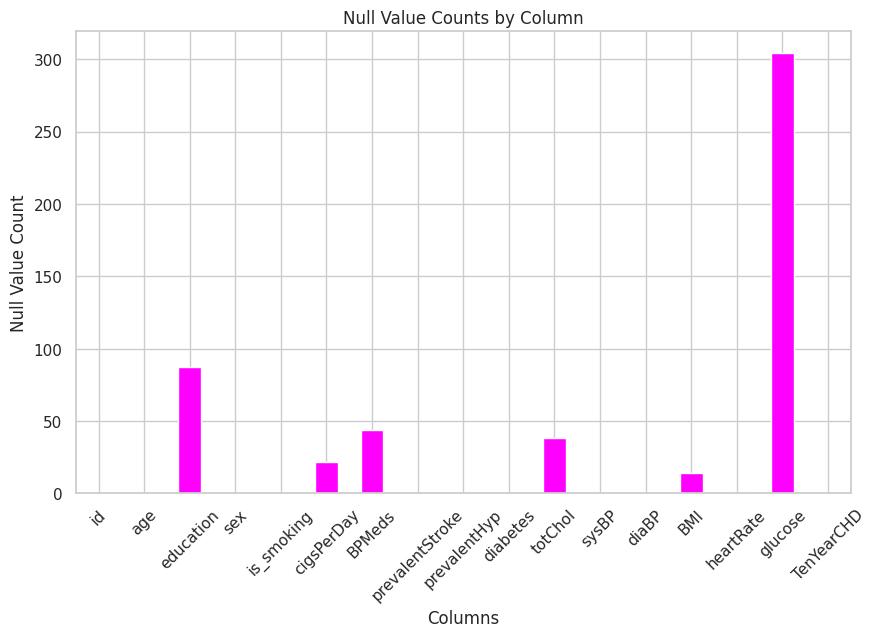

In [247]:
# Visualizing the missing values
# Calculate the count of null values in each column
null_counts = clas.isnull().sum()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
null_counts.plot(kind='bar', color='Magenta')
plt.xlabel('Columns')
plt.ylabel('Null Value Count')
plt.title('Null Value Counts by Column')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.show()

### What did you know about your dataset?

Based on the initial analysis, here's what we can infer about dataset:

**Dataset info:**
* TenYearCHD is the dependent variable column.

**Dataset Size:**
* The dataset consists of 3,390 rows and 17 columns.
* Each row represents a patient, and each column represents a different attribute or feature related to cardiovascular risk factors.

**Duplicate Values:**
* There are no duplicate rows in the dataset as the count of duplicated rows is 0.

**Missing Values/Null Values:**

The dataset contains missing values in several columns, which may require
handling during data preprocessing.

* "education" has 87 missing values.
* "cigsPerDay" has 22 missing values.
* "BPMeds" has 44 missing values.
* "totChol" has 38 missing values.
* "BMI" has 14 missing values.
* "heartRate" has 1 missing value.
* "glucose" has 304 missing values.

## ***2. Understanding Your Variables***

In [248]:
# Dataset Columns
clas.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [249]:
# Dataset Describe
clas.describe(include = 'all').round(2).T

count unique  top  freq    mean     std    min     25%  \
id               3390.0    NaN  NaN   NaN  1694.5  978.75    0.0  847.25   
age              3390.0    NaN  NaN   NaN   49.54    8.59   32.0    42.0   
education        3303.0    NaN  NaN   NaN    1.97    1.02    1.0     1.0   
sex                3390      2    F  1923     NaN     NaN    NaN     NaN   
is_smoking         3390      2   NO  1703     NaN     NaN    NaN     NaN   
cigsPerDay       3368.0    NaN  NaN   NaN    9.07   11.88    0.0     0.0   
BPMeds           3346.0    NaN  NaN   NaN    0.03    0.17    0.0     0.0   
prevalentStroke  3390.0    NaN  NaN   NaN    0.01    0.08    0.0     0.0   
prevalentHyp     3390.0    NaN  NaN   NaN    0.32    0.46    0.0     0.0   
diabetes         3390.0    NaN  NaN   NaN    0.03    0.16    0.0     0.0   
totChol          3352.0    NaN  NaN   NaN  237.07   45.25  107.0   206.0   
sysBP            3390.0    NaN  NaN   NaN   132.6   22.29   83.5   117.0   
diaBP            3390.0    NaN  NaN   NaN   82.88   12.02   48.0    74.5   
BMI              3376.0    NaN  NaN   NaN   25.79    4.12  15.96   23.02   
heartRate        3389.0    NaN  NaN   NaN   75.98   11.97   45.0    68.0   
glucose          3086.0    NaN  NaN   NaN   82.09   24.24   40.0    71.0   
TenYearCHD       3390.0    NaN  NaN   NaN    0.15    0.36    0.0     0.0   

                    50%      75%     max  
id               1694.5  2541.75  3389.0  
age                49.0     56.0    70.0  
education           2.0      3.0     4.0  
sex                 NaN      NaN     NaN  
is_smoking          NaN      NaN     NaN  
cigsPerDay          0.0     20.0    70.0  
BPMeds              0.0      0.0     1.0  
prevalentStroke     0.0      0.0     1.0  
prevalentHyp        0.0      1.0     1.0  
diabetes            0.0      0.0     1.0  
totChol           234.0    264.0   696.0  
sysBP             128.5    144.0   295.0  
diaBP              82.0     90.0   142.5  
BMI               25.38    28.04    56.8  
heartRate          75.0     83.0   143.0  
glucose            78.0     87.0   394.0  
TenYearCHD          0.0      0.0     1.0

### Variables Description

* **id:** An identifier for each patient (integer).
* **age:** The age of the patient (integer).
* **education:** The level of education of the patient (float). This is a categorical variable, but it's represented as a float. You might want to convert it to a proper categorical variable during preprocessing.
* **sex:** The gender of the patient (object). This is a categorical variable with two values, likely "M" for male and "F" for female.
* **is_smoking:** Indicates whether the patient is a smoker (object). This is a categorical variable, possibly "YES" or "NO."
* **cigsPerDay:** The number of cigarettes smoked per day (float). This is a numerical variable.
* **BPMeds:** Indicates whether the patient is on blood pressure medications (float). This is a binary variable, likely representing "0.0" for no medication and "1.0" for medication use.
* **prevalentStroke:** Indicates whether the patient has a prevalent stroke (integer). This is a binary variable, likely "0" for no stroke and "1" for a history of stroke.
* **prevalentHyp:** Indicates whether the patient has prevalent hypertension (integer). This is a binary variable, likely "0" for no hypertension and "1" for hypertension.
* **diabetes:** Indicates whether the patient has diabetes (integer). This is a binary variable, likely "0" for no diabetes and "1" for diabetes.
* **totChol:** Total cholesterol level (float). This is a numerical variable.
* **sysBP:** Systolic blood pressure (float). This is a numerical variable.
* **diaBP:** Diastolic blood pressure (float). This is a numerical variable.
* **BMI:** Body mass index (float). This is a numerical variable.
* **heartRate:** Heart rate of the patient (float). This is a numerical variable.
* **glucose:** Glucose level (float). This is a numerical variable.
* **TenYearCHD:** The target variable indicating whether the patient is at risk of coronary heart disease (CHD) within the next 10 years (integer). This is a binary variable, likely "0" for no risk and "1" for risk.

### Check Unique Values for each variable.

In [306]:
# Check Unique Values for each variable.
unique_value_counts = clas.apply(lambda x: len(x.unique()))
unique_value_counts

age                    39
education               4
sex                     2
is_smoking              2
cigs_per_day           30
bp_meds                 2
prevalent_stroke        2
prevalent_hyp           2
diabetes                2
total_cholesterol     208
systolic_bp           179
diastolic_bp          118
bmi                  1182
heart_rate             58
glucose               206
ten_year_chd            2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [251]:
# Write your code to make your dataset analysis ready.
# Dropping the id column because it is not relevant
clas.drop(columns=['id'], inplace=True)

In [252]:
# Renaming the columns
# Renaming to lowercase and separating informative words with underscores.
clas.rename(columns={'cigsPerDay':'cigs_per_day','BPMeds':'bp_meds',
                   'prevalentStroke':'prevalent_stroke','prevalentHyp':'prevalent_hyp',
                   'totChol':'total_cholesterol','sysBP':'systolic_bp','diaBP':'diastolic_bp',
                   'BMI':'bmi','heartRate':'heart_rate','TenYearCHD':'ten_year_chd'},
          inplace = True)

In [253]:
# Defining 3 lists containing the column names which will be helpful for further manipulation.
# This is defined based on the number of unique values for each attribute
dependent_var = ['ten_year_chd']

categorical_var = [i for i in clas.columns if clas[i].nunique()<=4]
print(f'categorical_var: {categorical_var}')
print('\n')

continuous_var = [i for i in clas.columns if i not in categorical_var]
print(f'continuous_var: {continuous_var}')

categorical_var: ['education', 'sex', 'is_smoking', 'bp_meds', 'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'ten_year_chd']


continuous_var: ['age', 'cigs_per_day', 'total_cholesterol', 'systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose']


In [254]:
!pip install dataprep

DataPrep Report
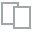
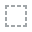
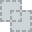
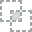
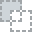
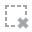
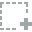
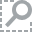
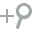
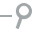
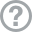
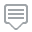
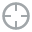
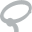
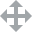
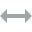
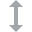
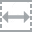
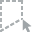
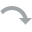
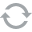
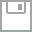
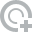
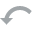
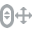
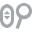
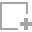
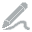
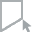
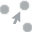
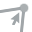
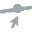

In [255]:
from dataprep.eda import create_report
report = create_report(clas)
report

### What all manipulations have you done and insights you found?

**Data Manipulations:**

**1. Dropping Irrelevant Column:**
Dropped the 'id' column as it was deemed irrelevant to the analysis.

**2.Column Renaming:**
Renamed the columns to make them consistent, using lowercase letters and separating informative words with underscores.

**3. Defining Lists for Further Manipulation:**
Defined three lists that categorize your columns into types (dependent, categorical, continuous). This categorization is based on the number of unique values for each attribute.

**Insights:**
* Categorical Variables: Identified and printed the list of categorical variables based on the number of unique values. Categorical variables typically have a small number of unique values.
* Continuous Variables:
Identified and printed the list of continuous variables based on the absence in the categorical variable list.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

There are 2879 patients without heart disease and 511 patients with heart disease.
---------------------------------------------------------------------------------------------------------------------


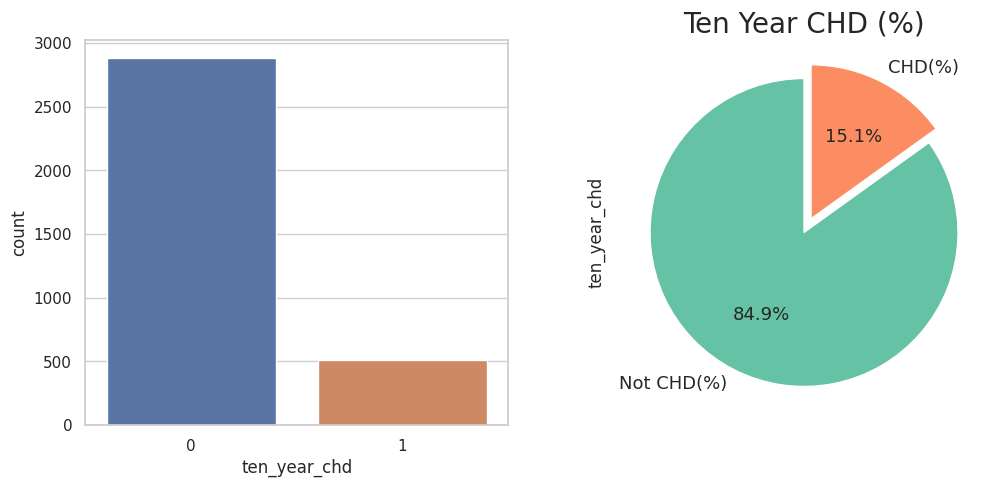

In [256]:
# Chart - 1 visualization code
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Chart 1 - Countplot for TenYearCHD
sns.countplot(x="ten_year_chd", data=clas, ax=axes[0])
cases = clas['ten_year_chd'].value_counts()
print(f"There are {cases[0]} patients without heart disease and {cases[1]} patients with heart disease.")
print('---------------------------------------------------------------------------------------------------------------------')

# Color palette selection
colors = sns.color_palette("Set2")

# Chart 2 - Pie chart for TenYearCHD percentage
explode = [0, 0.1]
textprops = {'fontsize': 13}
clas['ten_year_chd'].value_counts().plot.pie(labels=['Not CHD(%)', 'CHD(%)'], startangle=90, colors=colors, explode=explode, autopct="%1.1f%%", textprops=textprops, ax=axes[1])
axes[1].set_title('Ten Year CHD (%)', fontsize=20)

# Display the chart
plt.show()

##### 1. Why did you pick the specific chart?

I picked a countplot and a pie chart for visualization. The countplot is suitable for showing the distribution of binary categories, and the pie chart effectively represents the composition of categories as percentages, making it easy to understand the relative proportions of patients with and without heart disease.

##### 2. What is/are the insight(s) found from the chart?

The insights from the chart are:

* The countplot reveals that the majority of patients in the dataset do not have heart disease, with 2,879 patients (about 84.9%) falling into this category.
* The pie chart visually shows the percentage breakdown, highlighting that approximately 15.1% of the patients in the dataset have heart disease.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can potentially have a positive business impact. They provide a clear understanding of the distribution of patients with and without heart disease, which can inform healthcare professionals and policymakers in Framingham, Massachusetts, about the prevalence of heart disease in the population. This information can be used to allocate resources, develop targeted preventive measures, and plan healthcare interventions to reduce the incidence of heart disease.

There isn't necessarily a negative business impact from these insights, but one should be cautious not to draw premature conclusions about the causes of heart disease or make major business decisions based solely on the prevalence of heart disease in this dataset. Further analysis and consideration of other risk factors and medical data are needed to make informed decisions related to healthcare strategies.

#### Chart - 2

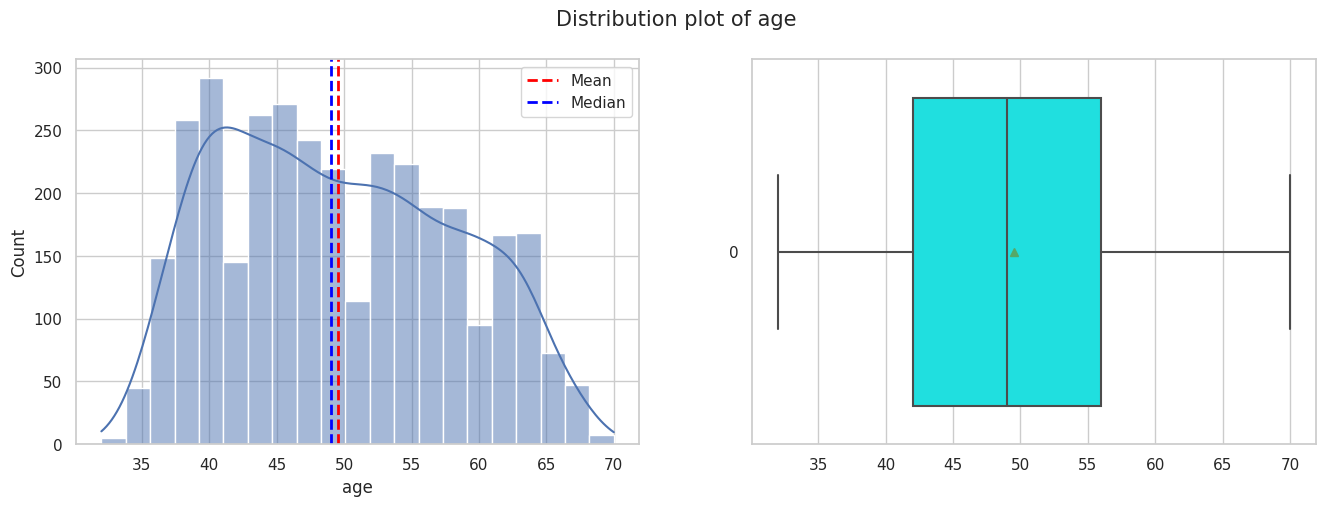

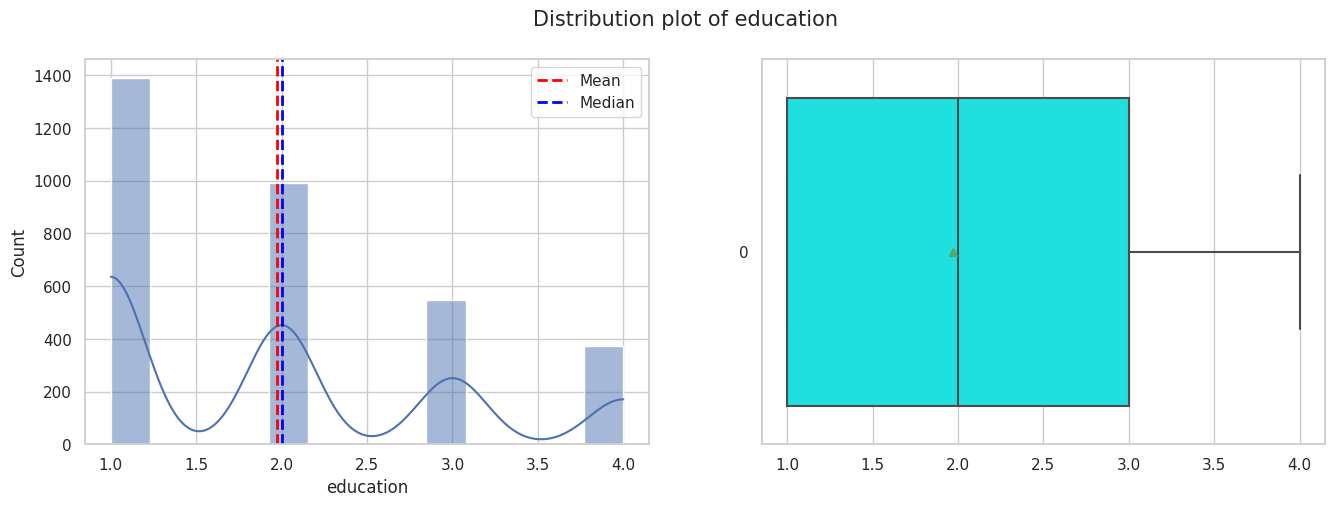

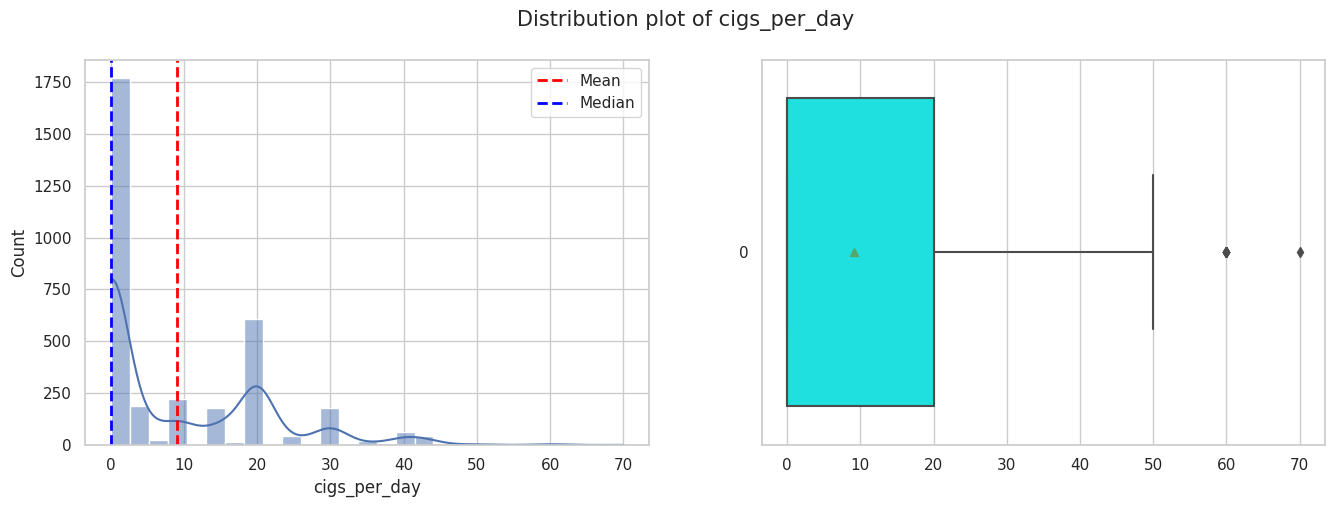

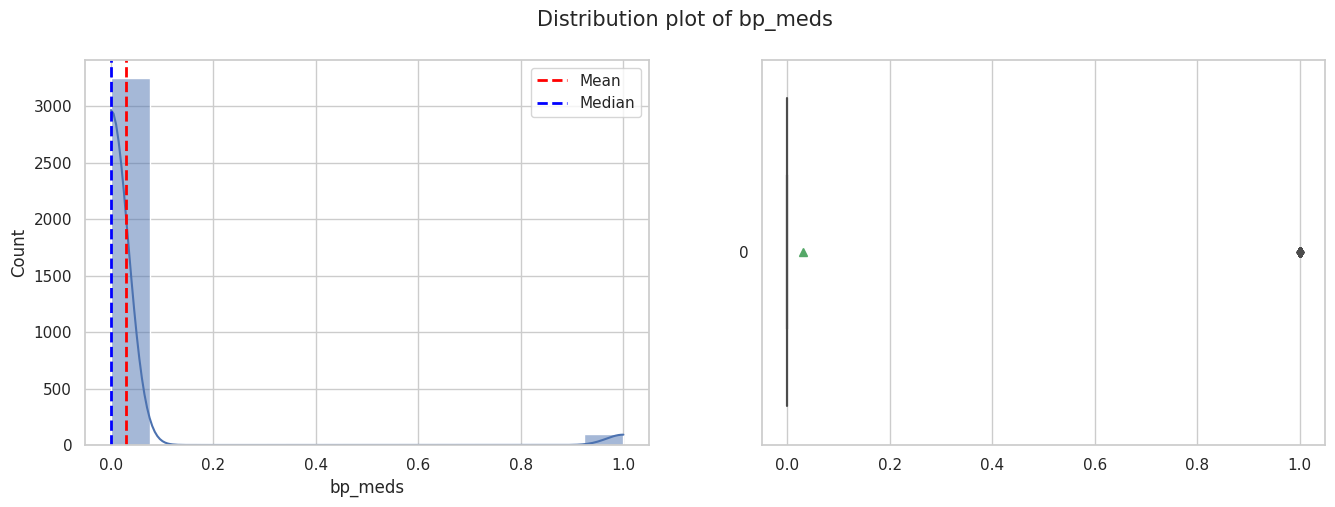

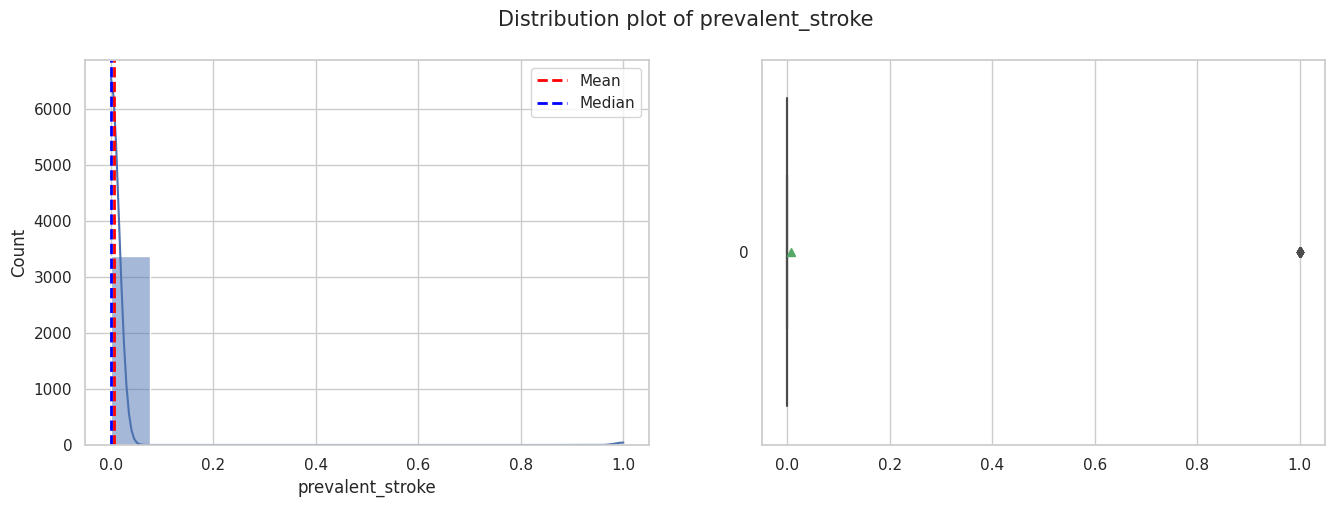

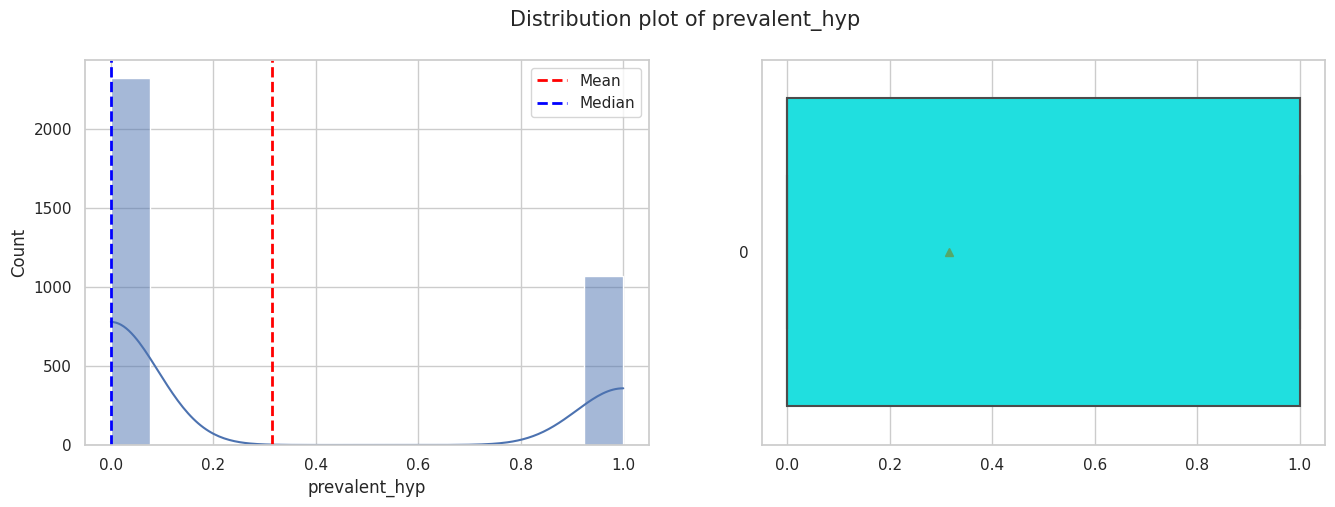

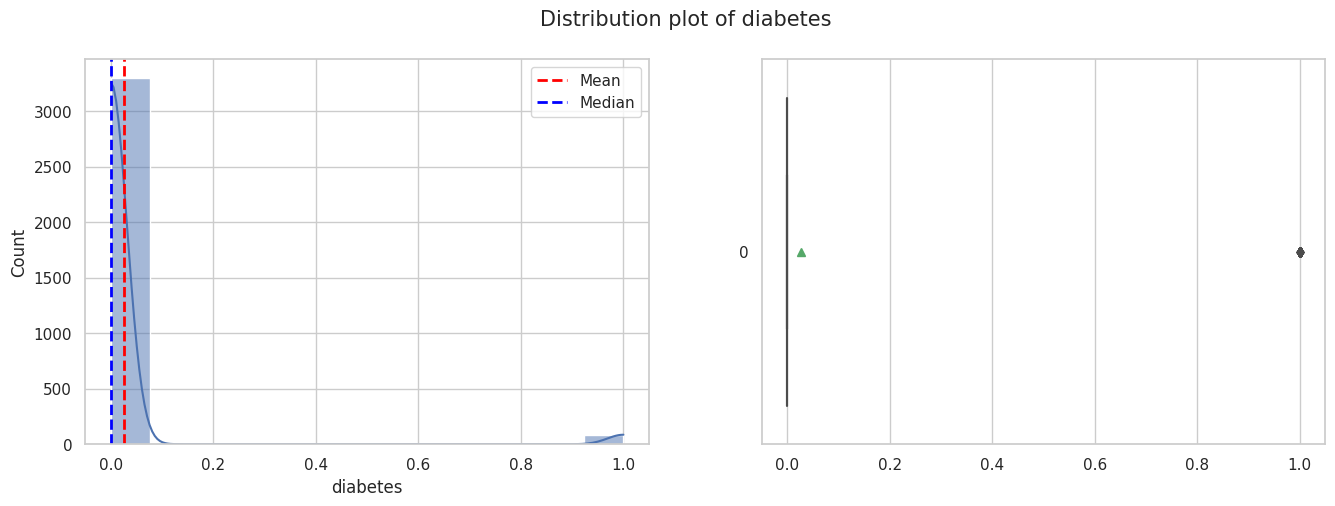

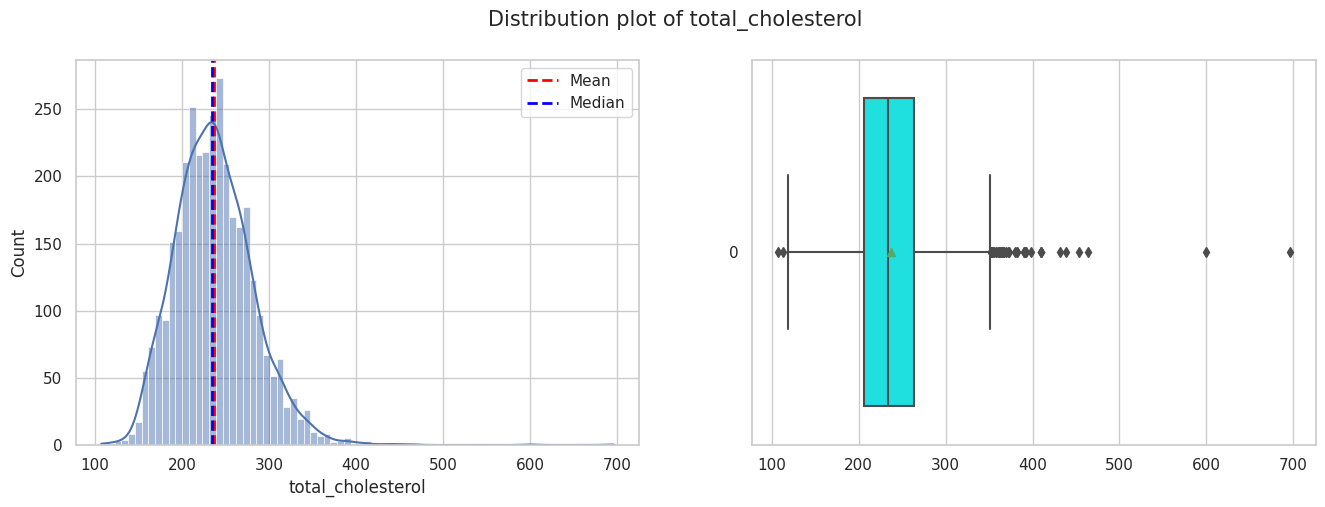

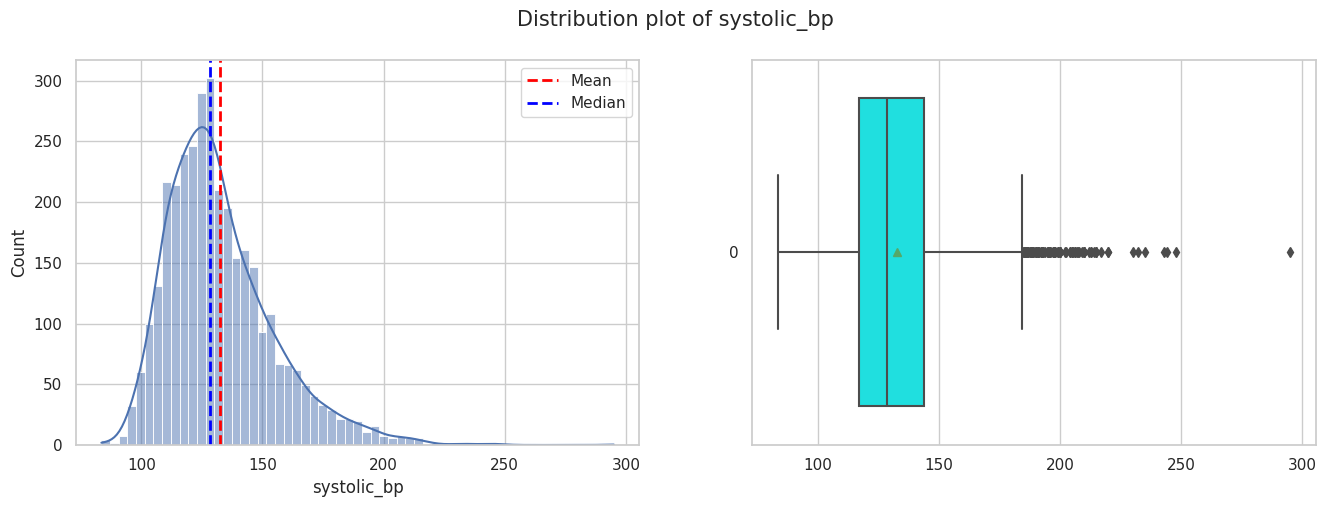

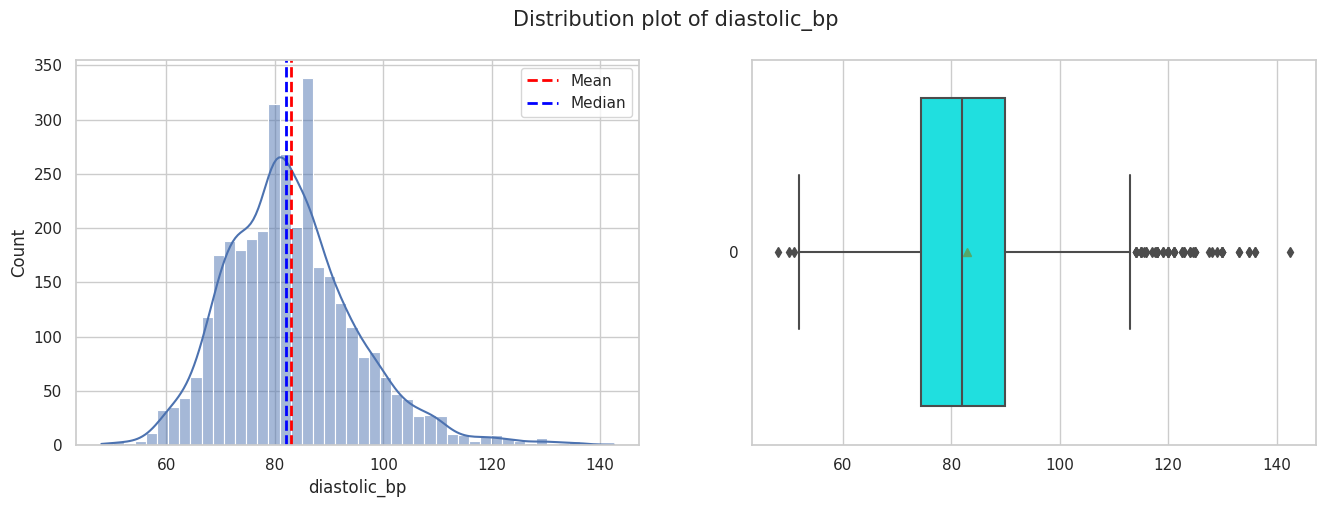

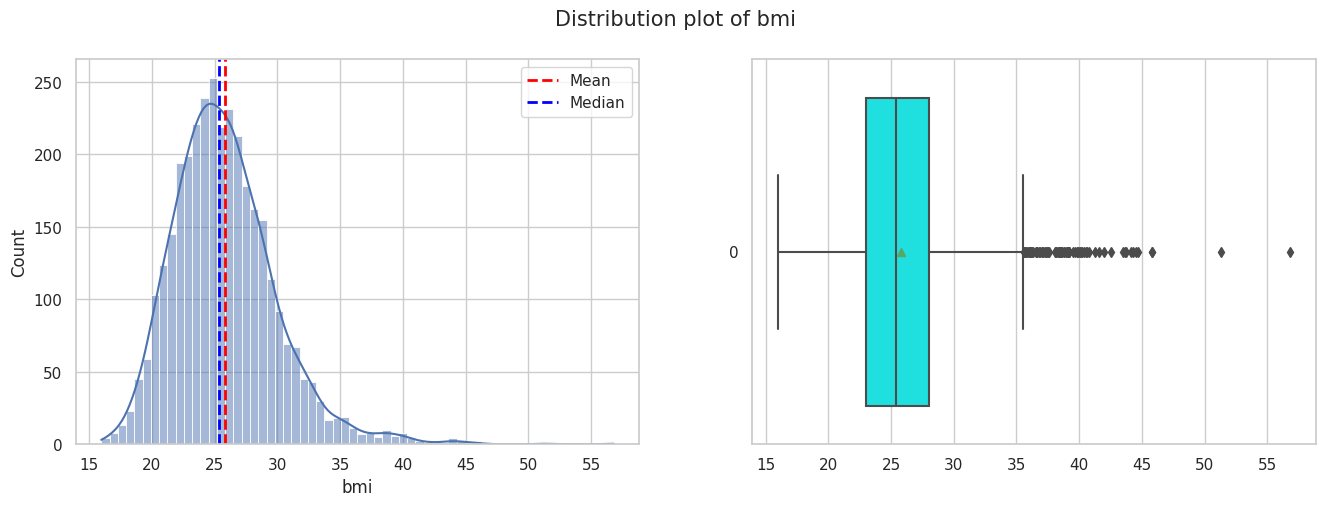

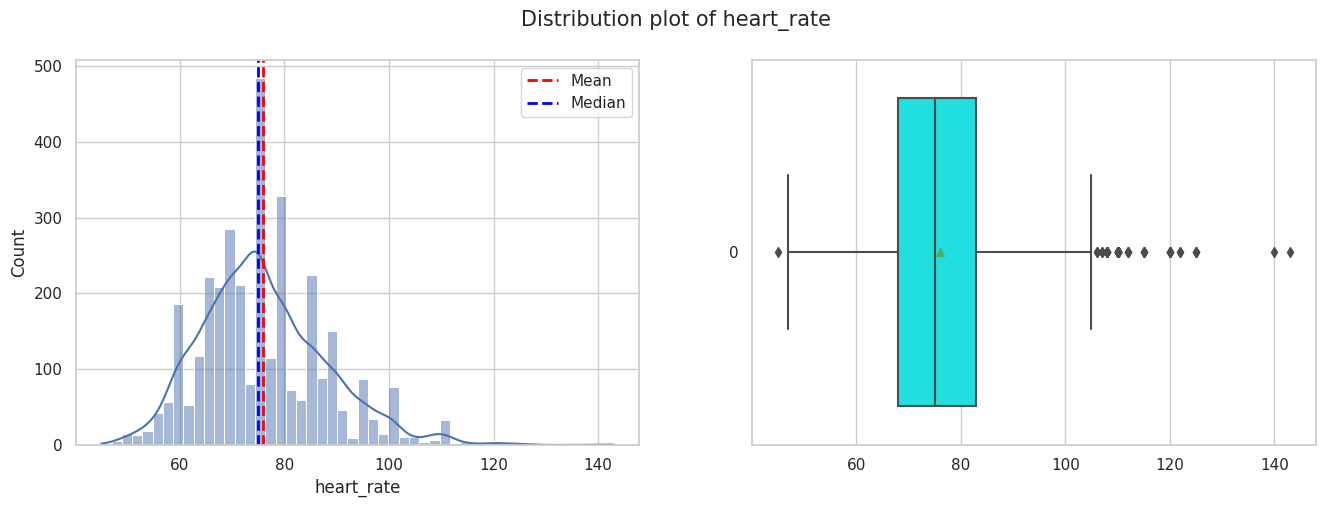

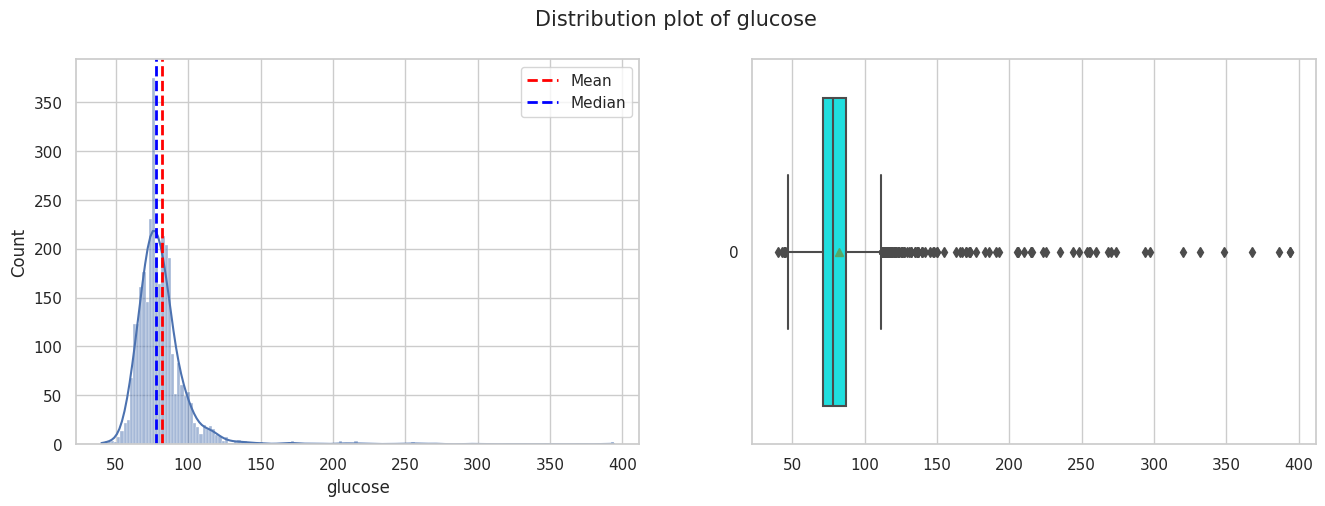

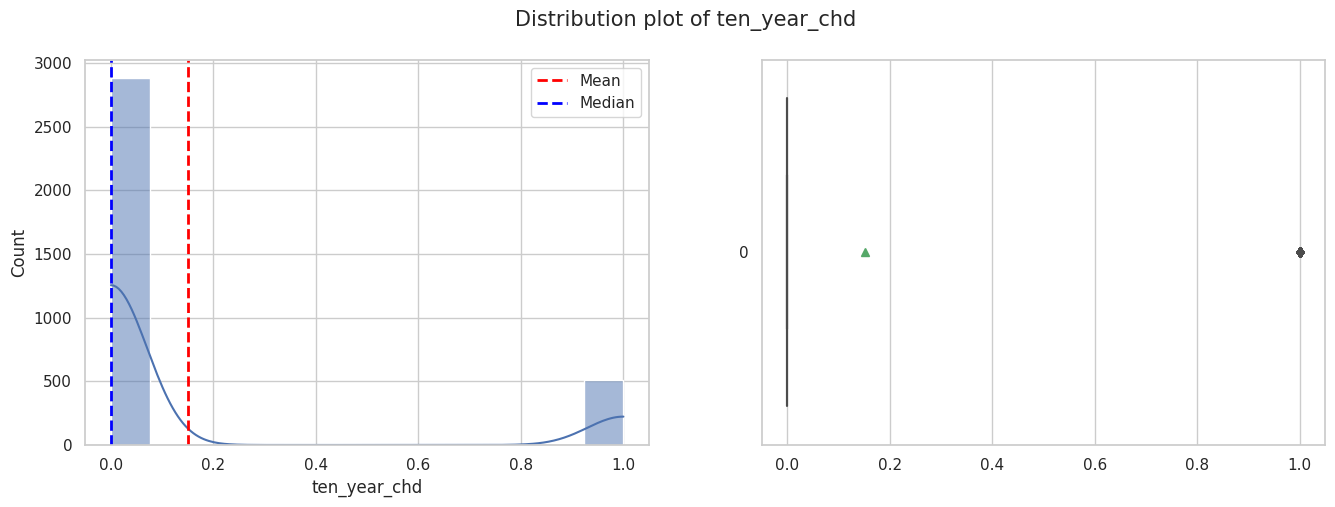

In [257]:
# Chart - 2 visualization code
# Visualizing code of histogram plot & boxplot for each column to know the data distribution
for col in clas.describe().columns:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

    # Histogram with mean and median lines
    sns.histplot(clas[col], ax=axes[0], kde=True)
    axes[0].axvline(clas[col].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
    axes[0].axvline(clas[col].median(), color='blue', linestyle='dashed', linewidth=2, label='Median')
    axes[0].legend()

    # Boxplot with mean line
    sns.boxplot(clas[col], ax=axes[1], orient='h', showmeans=True, color='cyan')

    fig.suptitle("Distribution plot of " + col, fontsize=15)
    plt.show()

##### 1. Why did you pick the specific chart?

The specific charts chosen here are histogram plots and boxplots for each column, providing a visual representation of the distribution and central tendency of the numerical data. These charts help in understanding the spread, shape, and key statistics of each feature.

##### 2. What is/are the insight(s) found from the chart?

**Distribution Insights:**

* Most patients in the dataset are in the age range of 40 to 60, with the mean age being 49.54 and a minimum age of 32 and maximum of 70.
* The education level is mostly concentrated in categories 1 to 3.
* The majority of patients are non-smokers (is_smoking = 'NO') and female.
* Cigarettes per day ('cigsPerDay') have a right-skewed distribution, with a mean of 9.07 and a maximum of 70.
* Blood pressure medication ('BPMeds') and prevalent stroke ('prevalentStroke') are infrequent, while prevalent hypertension ('prevalentHyp') is more common.
* The distribution of total cholesterol ('totChol'), systolic blood pressure ('sysBP'), diastolic blood pressure ('diaBP'), BMI, heart rate, and glucose levels varies.

**Summary Statistics:**
* The mean and standard deviation provide insights into the central tendency and spread of the numerical features.
* For example, the mean BMI is 25.79 with a standard deviation of 4.12.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can positively impact business decisions in healthcare. Understanding the distribution of risk factors and patient characteristics allows for targeted interventions and personalized healthcare strategies. For instance, focusing on preventive measures for patients with high-risk factors.
Insights leading to negative growth?

**Negative Insight/Concern:** One potential concern could be the high maximum value for 'totChol' (total cholesterol) at 696, which seems unusually high. Such extreme values might indicate data entry errors or outliers that could impact the accuracy of predictive models. Addressing and validating these outliers is crucial to ensure the reliability of insights and prevent negative impact on decision-making.

#### Chart - 3

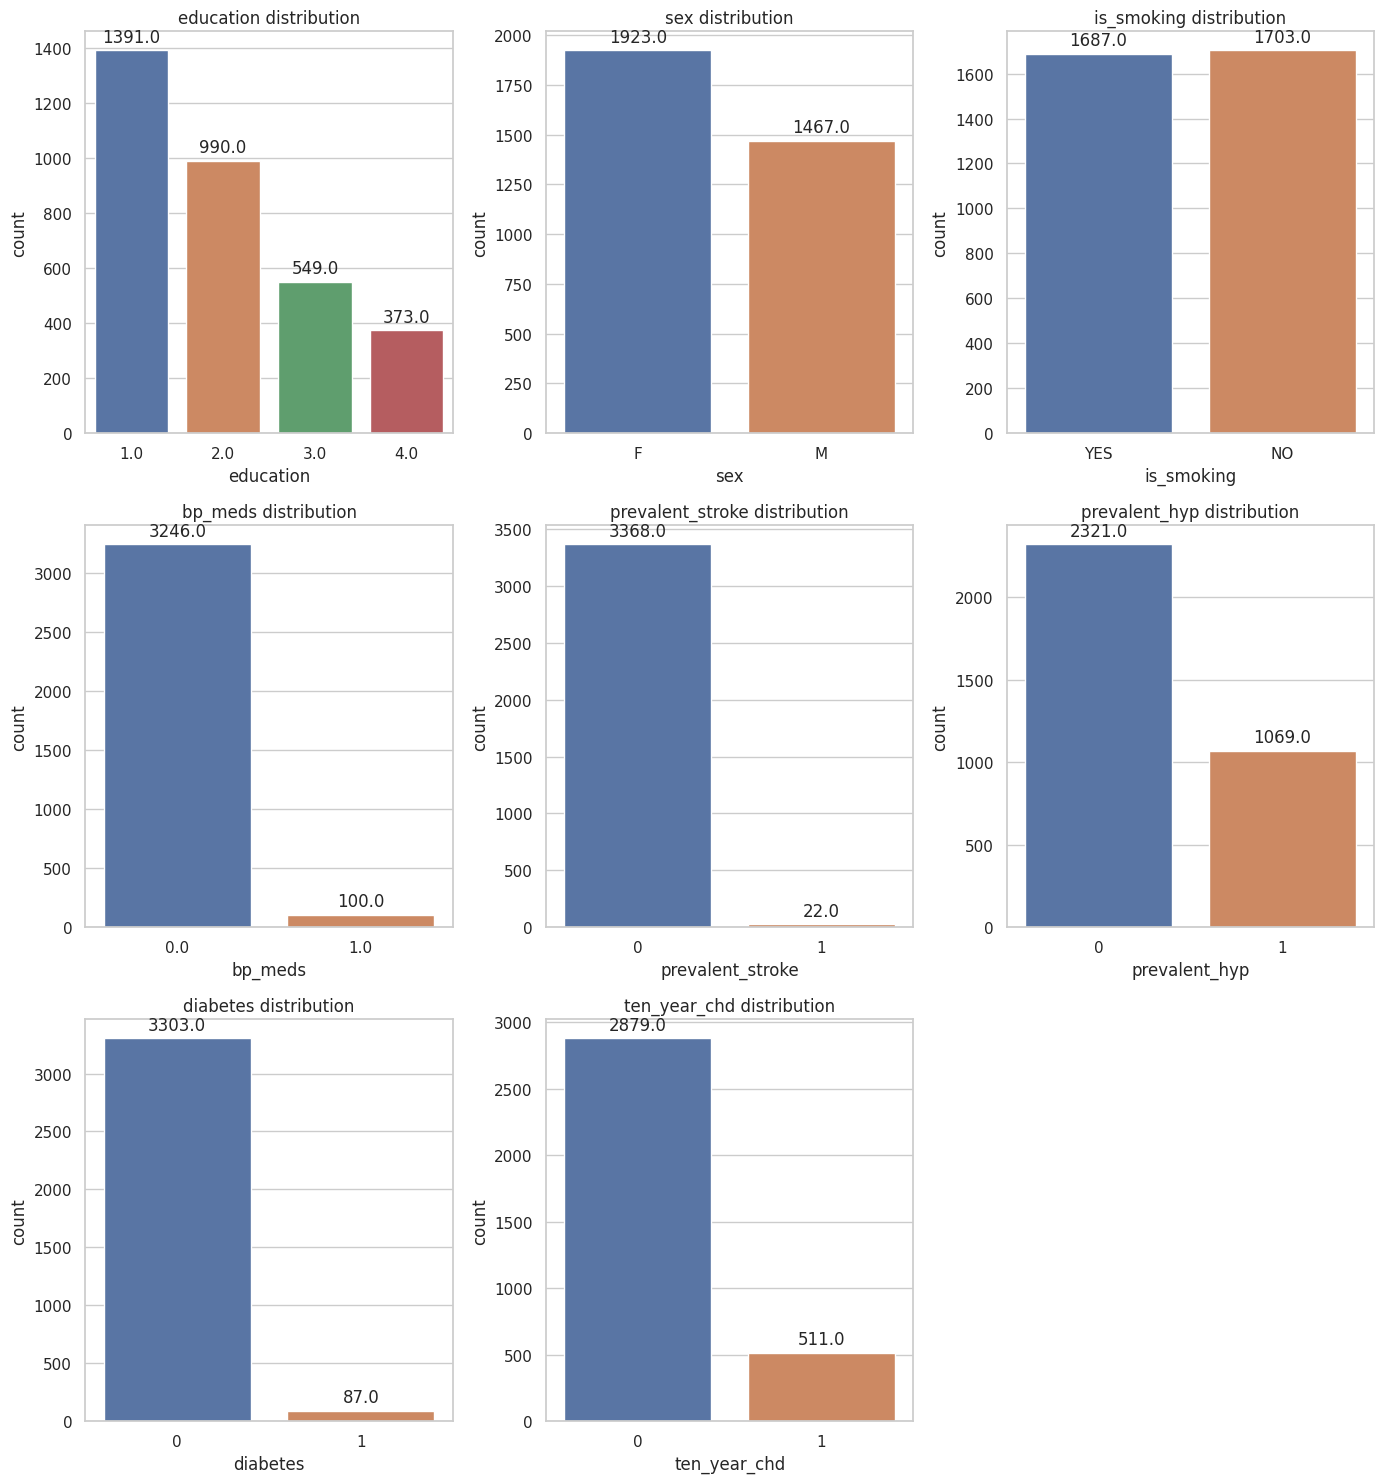

In [258]:
# Analysing the distribution of categorical variables in the dataset
import math

# Calculate the number of rows needed based on the number of categorical variables
num_vars = len(categorical_var)
num_cols = 3
num_rows = math.ceil(num_vars / num_cols)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 5 * num_rows))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Iterate through categorical variables
for i, cat_var in enumerate(categorical_var):
    plt.sca(axes[i])
    p = sns.countplot(x=cat_var, data=clas)
    plt.xlabel(cat_var)
    plt.title(cat_var + ' distribution')

    # Annotate each bar with the count
    for bar in p.patches:
        plt.annotate(f'{bar.get_height()}', (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Hide any empty subplots
for j in range(len(categorical_var), len(axes)):
    axes[j].axis('off')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose countplots because they are effective for visualizing the distribution of categorical variables. The count of each category is displayed, providing a quick overview of the dataset's categorical composition.

##### 2. What is/are the insight(s) found from the chart?

**Distribution Insights:**
The countplots display the distribution of each categorical variable, offering insights into the prevalence of different categories.
For example, you can observe the gender distribution, smoking habits, and other categorical characteristics.

**Frequency of Categories:**
The counts annotated on each bar provide a clear understanding of the frequency of each category within a variable.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can positively impact business decisions, especially in healthcare. Understanding the distribution of categorical variables allows for targeted interventions and tailored healthcare strategies. For instance, identifying the prevalence of certain risk factors or lifestyle choices can guide health promotion programs.

#### Chart - 4

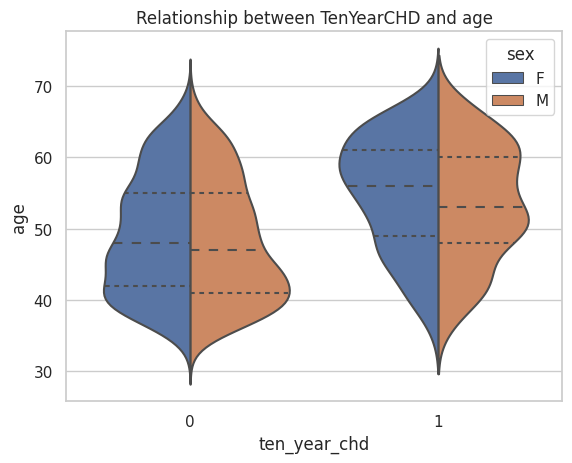

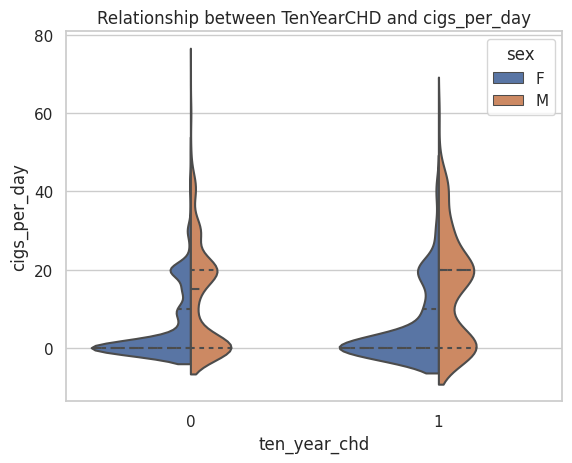

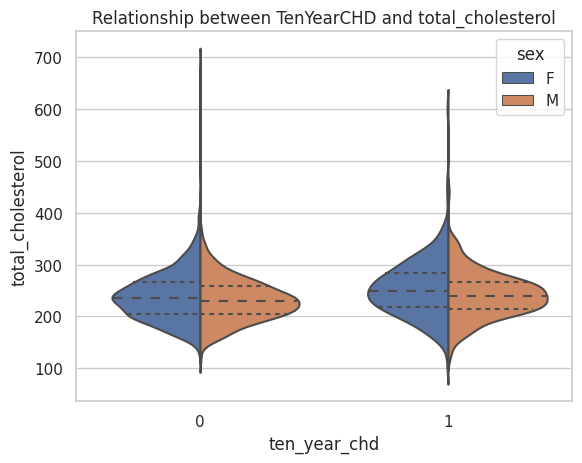

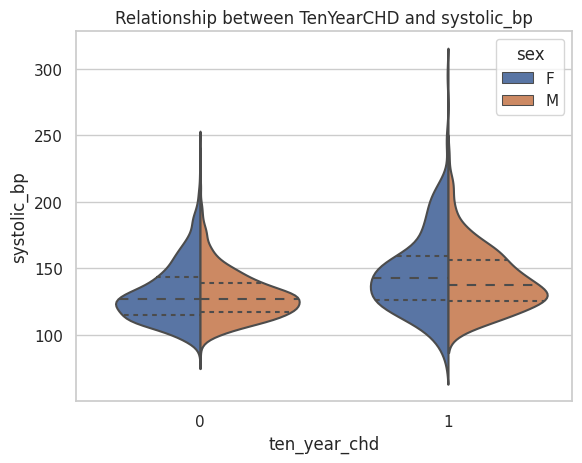

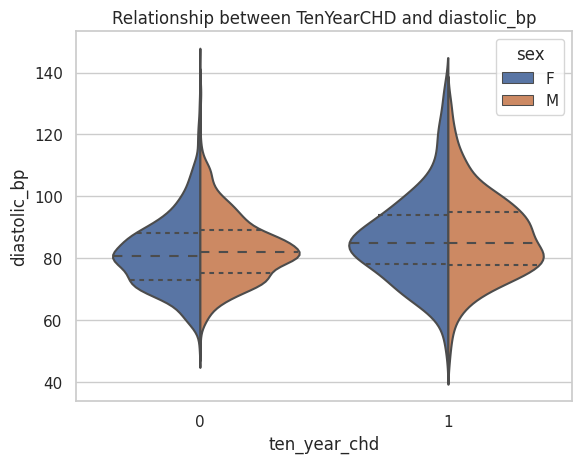

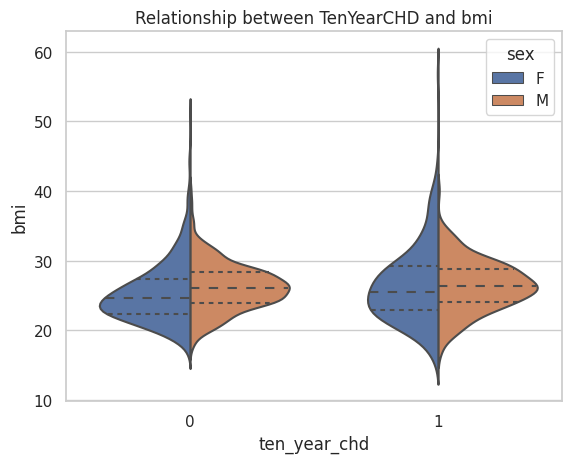

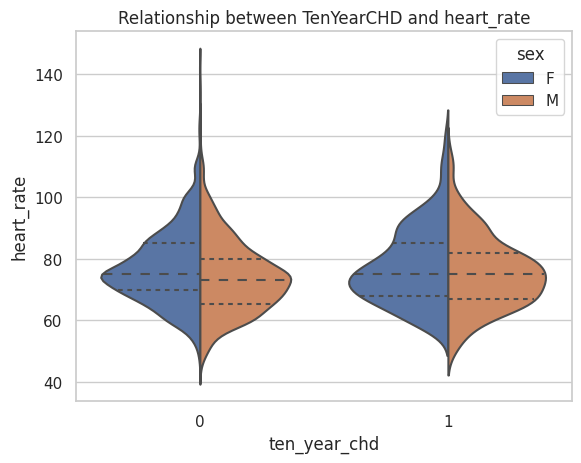

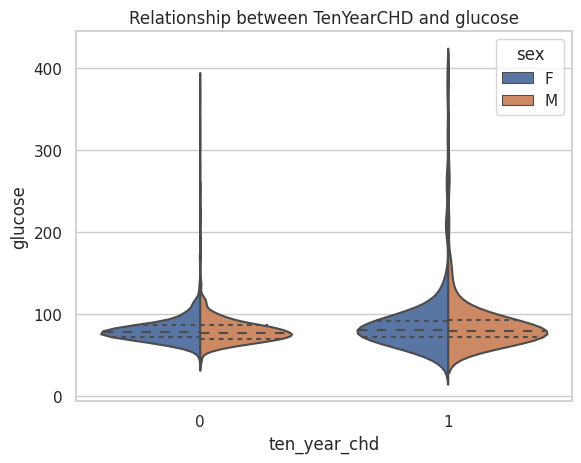

In [259]:
# Chart - 4 visualization code
# Relationship between the dependent variable and continuous independent variables with the help of catplot named violinplot
for i in continuous_var:
    sns.violinplot(data=clas, x="ten_year_chd", y=i, hue="sex", split=True, inner="quart")
    plt.title(f'Relationship between TenYearCHD and {i}')
    plt.show()

##### 1. Why did you pick the specific chart?

The specific chart used here is a violin plot. A violin plot is suitable for visualizing the distribution of a continuous variable across different categories, in this case, the relationship between the dependent variable ("TenYearCHD") and each continuous independent variable. The use of hue and split allows for additional insights by incorporating the "sex" variable.

##### 2. What is/are the insight(s) found from the chart?

* **Distribution Insights:**
The violin plots show the distribution of each continuous variable for different categories of the dependent variable ("TenYearCHD").
Patterns in the shape of the violins can indicate how the distribution of the continuous variable varies with the target variable.

* **Sex-Based Comparison:**
The split violins based on "sex" allow for a comparison between male and female distributions within each category of the dependent variable.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can positively impact business decisions in healthcare. Understanding how continuous variables are distributed concerning the risk of coronary heart disease ("TenYearCHD") can guide targeted interventions. For instance, identifying differences in distributions between males and females may help in tailoring preventive strategies for specific demographic groups.

**No negative growth insights** are apparent from the provided information. However, it's essential to interpret the results cautiously. If the distribution of certain continuous variables significantly differs between high and low-risk groups for heart disease, it could highlight areas for targeted interventions.

#### Chart - 5

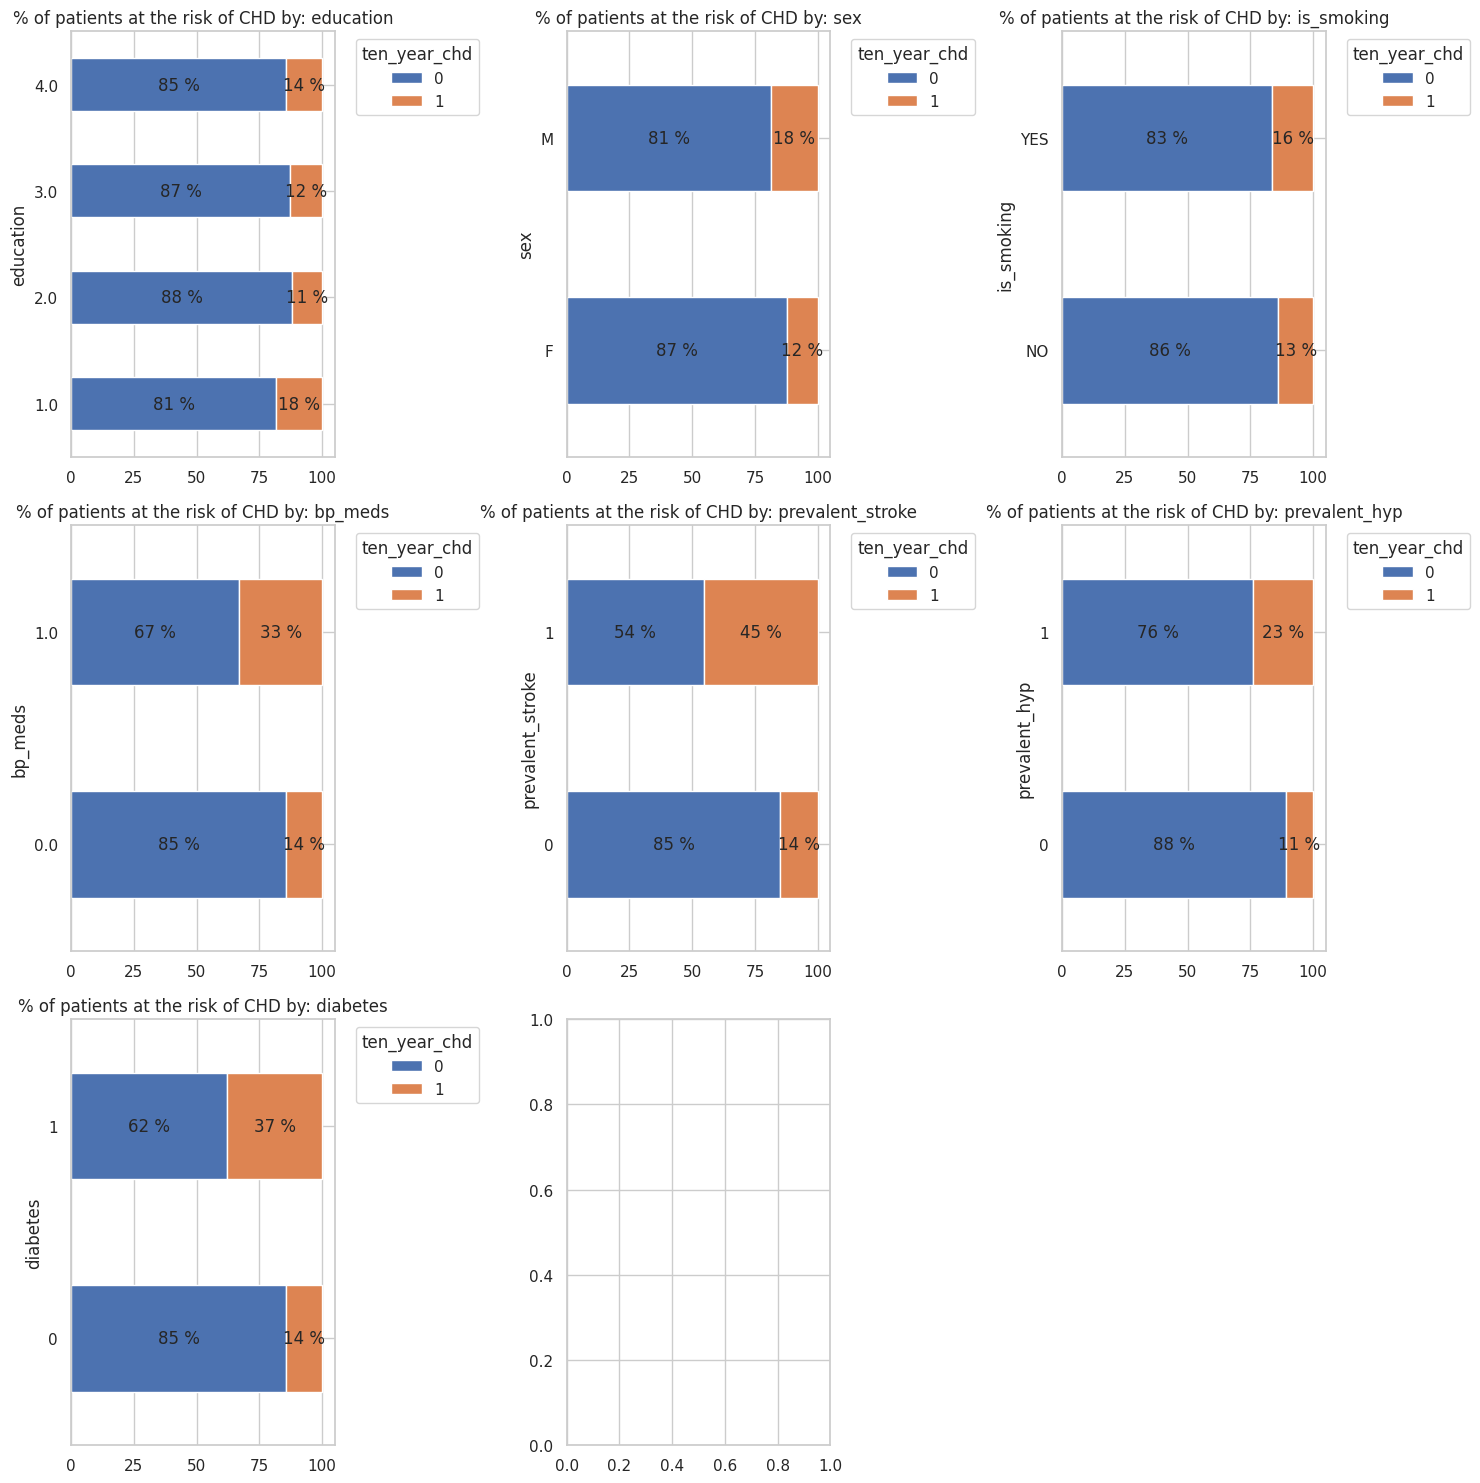

In [260]:
# Chart - 5 visualization code
# 100% stacked bar chart

# Calculate the number of rows needed based on the number of categorical variables
num_rows = (len(categorical_var) - 1) // 3 + 1

# Create subplots with 3 columns
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over categorical variables
for i, ax in zip(categorical_var[:-1], axes):
    x_var, y_var = i, dependent_var[0]

    # Calculate percentage and create 100% stacked bar chart
    df_grouped = clas.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var) * 100
    df_grouped.plot.barh(stacked=True, ax=ax)

    ax.legend(
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
        title=y_var
    )

    ax.set_title("% of patients at the risk of CHD by: " + i)

    for ix, row in df_grouped.reset_index(drop=True).iterrows():
        cumulative = 0
        for element in row:
            if element > 0.1:
                ax.text(
                    cumulative + element / 2,
                    ix,
                    f"{int(element)} %",
                    va="center",
                    ha="center",
                )
            cumulative += element
# Hide any empty subplots
for j in range(len(categorical_var), len(axes)):
    axes[j].axis('off')

# Adjust layout to prevent overlap and show plot
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart chosen is a 100% stacked bar chart. This type of chart is effective for visualizing the percentage distribution of categorical variables concerning a binary outcome, in this case, the risk of coronary heart disease (CHD). The stacked bars show the composition of each category, providing a clear comparison of the proportions.

##### 2. What is/are the insight(s) found from the chart?

**Risk Distribution Insights:**
* The chart displays the distribution of patients at risk of CHD across different categories of each categorical variable.
* Each bar represents 100%, and the segments show the percentage of patients at risk and not at risk within each category.

**Comparative Analysis:**
* The chart allows for a visual comparison of the proportions of patients at risk for CHD across different categories of each variable.
* It provides insights into how the risk of CHD varies within different groups.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can positively impact business decisions in healthcare. Understanding how the risk of CHD is distributed across various categorical factors enables targeted interventions and personalized healthcare strategies. For instance, identifying categories with a higher proportion of patients at risk can guide preventive measures and interventions.

**No negative growth insights:** If certain categories consistently show a higher percentage of patients at risk for CHD, it may indicate areas that require focused attention and intervention.

#### Chart - 6

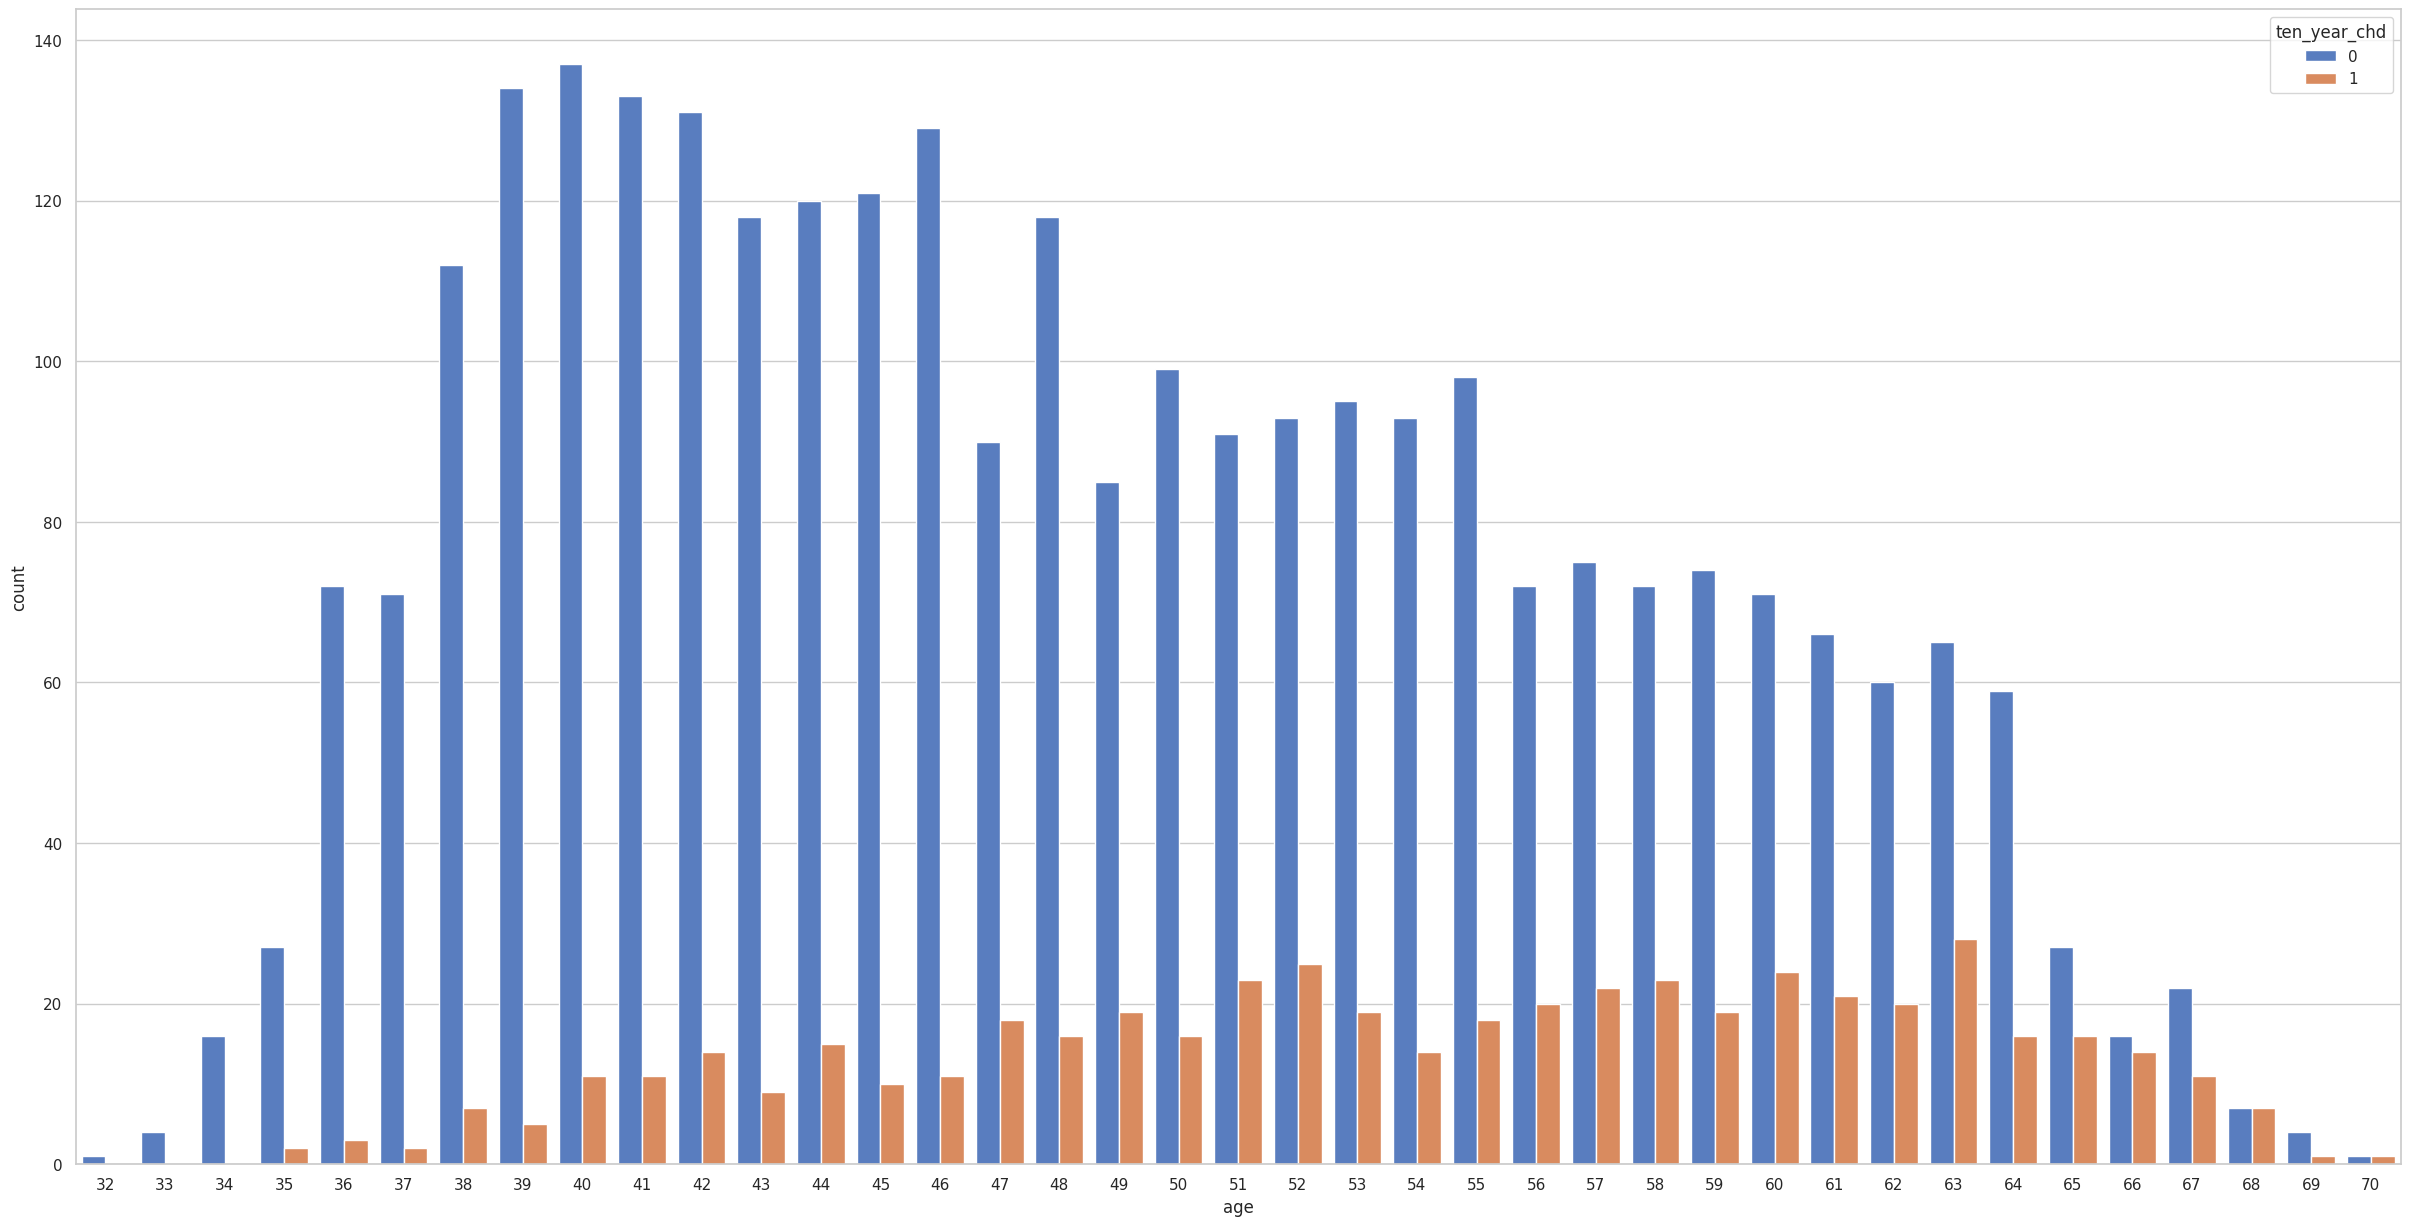

In [261]:
# Chart - 6 visualization code
plt.figure(figsize=(30,15))
sns.countplot(data=clas,x='age',hue='ten_year_chd',palette='muted')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

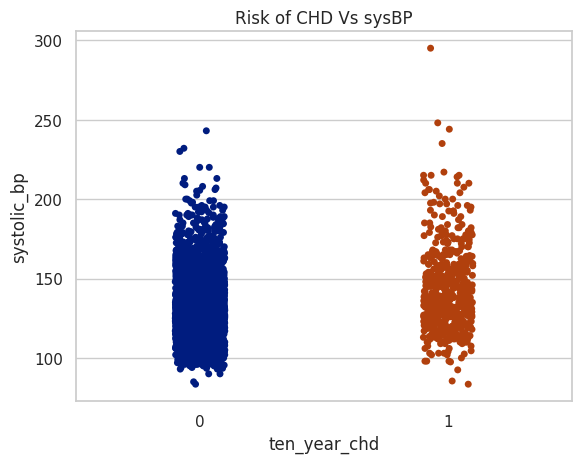

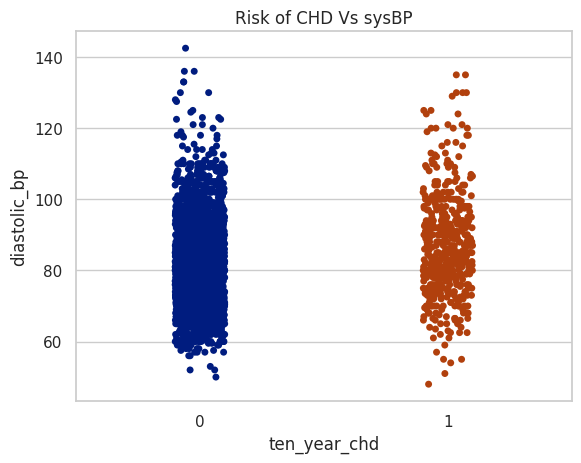

In [262]:
# Chart - 7 visualization code
sns.set(style='whitegrid')
ax=sns.stripplot(x='ten_year_chd',y='systolic_bp',data=clas,palette='dark')
plt.title('Risk of CHD Vs sysBP')
plt.show()

sns.set(style='whitegrid')
ax=sns.stripplot(x='ten_year_chd',y='diastolic_bp',data=clas,palette='dark')
plt.title('Risk of CHD Vs sysBP')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

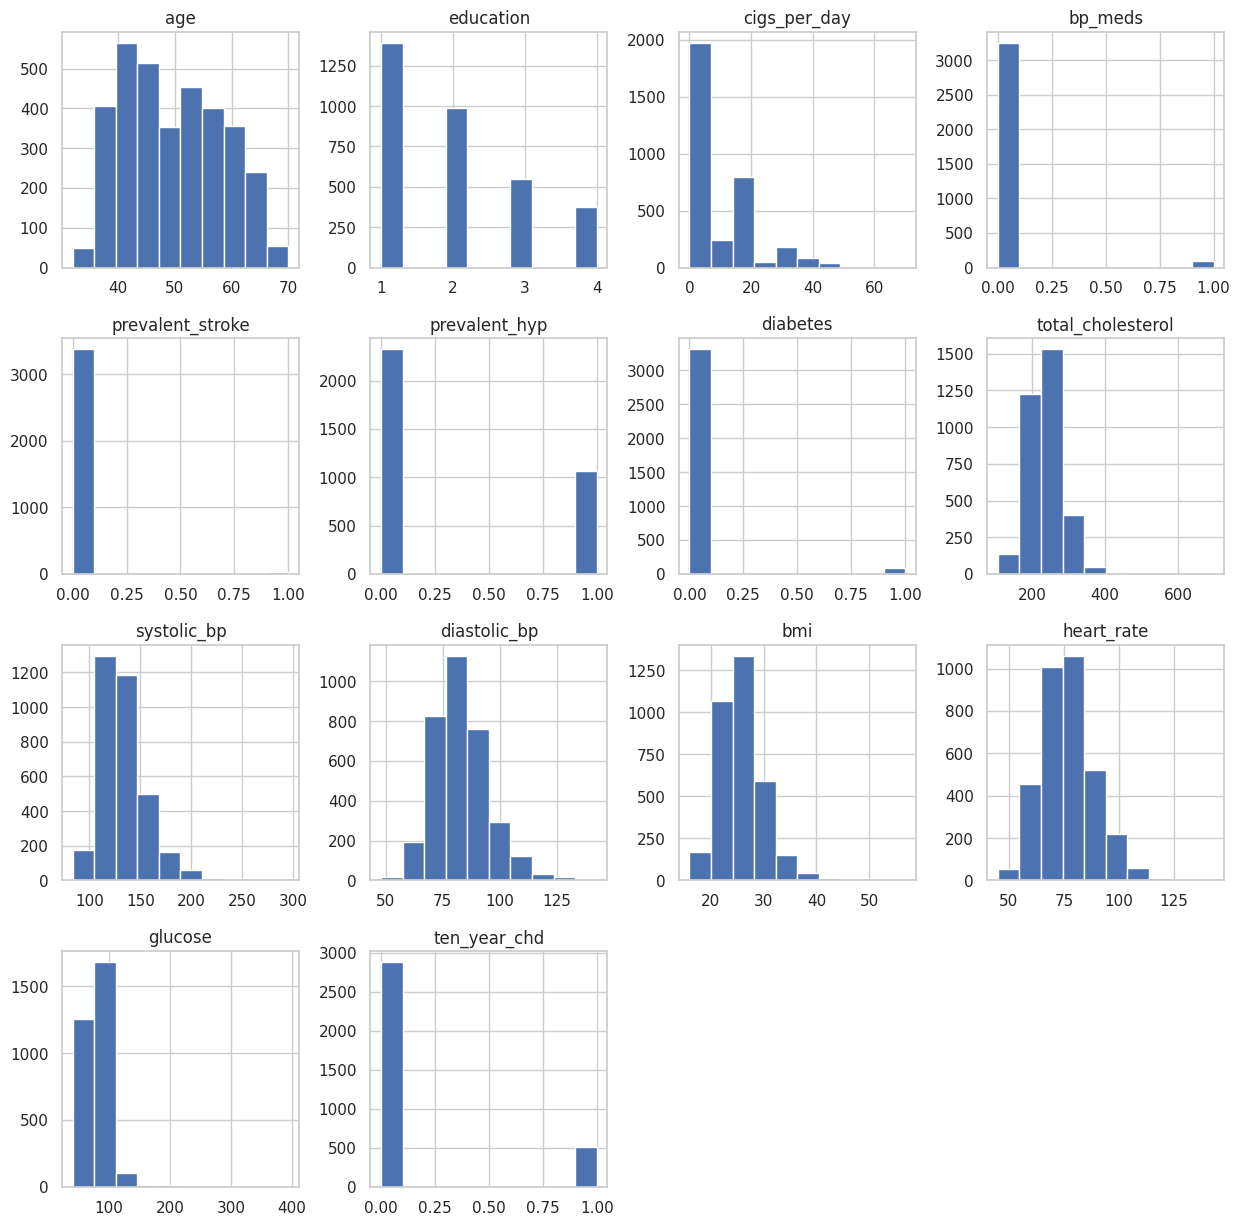

In [263]:
# Chart - 8 visualization code
fig=plt.figure(figsize=(15,15))
ax =fig.gca()
clas.hist(ax = ax)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [264]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [265]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [266]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [267]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [268]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

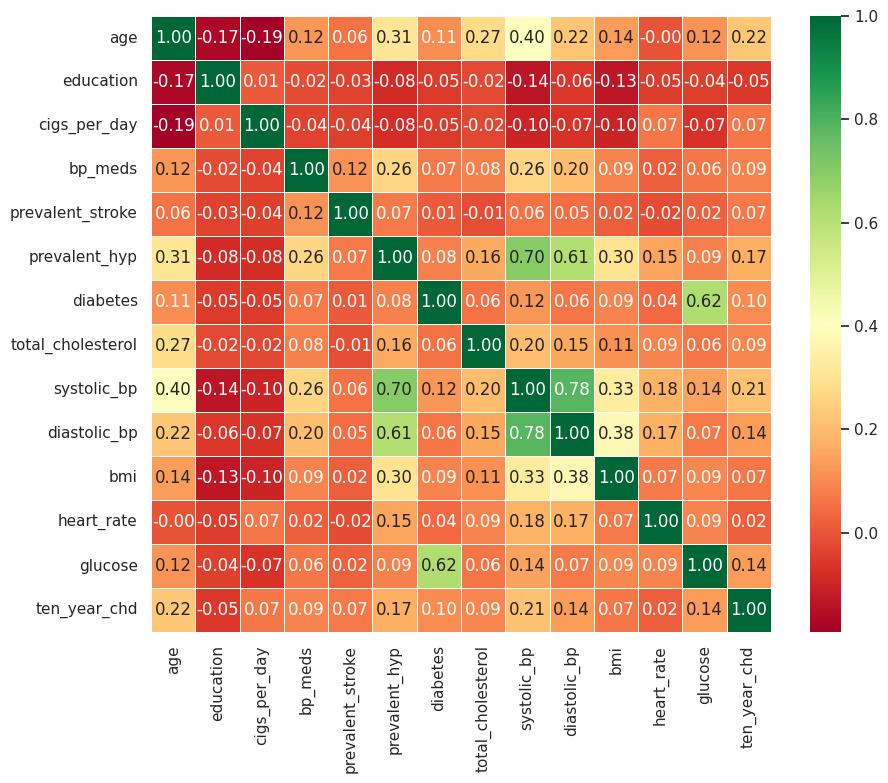

In [269]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,8))
sns.heatmap(clas.corr(),annot=True,cmap='RdYlGn', linewidths=.5,fmt='.2f')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [270]:
# Pair Plot visualization code
#sns.pairplot(clas, hue="ten_year_chd", corner = True)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [271]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [272]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [273]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [274]:
# Handling Missing Values & Missing Value Imputation
# Missing data is in considerable amount and we have mere 3990 observations,
# therefore, it needs to be treated with appropriate imputation rather than deleting them.

# percentage of missing data as per category
total = clas.isnull().sum().sort_values(ascending=False)
percent_total = (clas.isnull().sum()/clas.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

Total  Percentage
glucose              304    8.967552
education             87    2.566372
bp_meds               44    1.297935
total_cholesterol     38    1.120944
cigs_per_day          22    0.648968
bmi                   14    0.412979
heart_rate             1    0.029499

In [275]:
# total null values
clas.isna().sum().sum()

510

In [276]:
#print(clas['glucose'].mean())
print(clas['glucose'].median())
#print(clas['total_cholesterol'].mean())
print(clas['total_cholesterol'].median(), clas['total_cholesterol'].mean().round(3))
#print(clas['bmi'].mean())
print(clas['bmi'].median())
print('----------------------------------')
print(clas['cigs_per_day'].mean())
print('----------------------------------')
print(clas['heart_rate'].mode())

# Visualizing the mode values of the categorical columns because we are replacing missing values in it with its mode
print(clas['education'].mode())
print(clas['bp_meds'].mode())


78.0
234.0 237.074
25.38
----------------------------------
9.069477434679335
----------------------------------
0    75.0
Name: heart_rate, dtype: float64
0    1.0
Name: education, dtype: float64
0    0.0
Name: bp_meds, dtype: float64


#### **Replacing the missing values in the categorical columns with the most frequent entry:**

In [277]:
# Replacing the missing values in the categorical columns with its mode
clas['education'] = clas['education'].fillna(clas['education'].mode()[0])
clas['bp_meds'] = clas['bp_meds'].fillna(clas['bp_meds'].mode()[0])

In [278]:
# education distribution after mode imputation
clas.education.value_counts()

1.0    1478
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

#### Missing values imputation in **cigs_per_day**

In [279]:
# Mean and median numbers of cigarettes per day
clas.cigs_per_day.mean().round(0),clas.cigs_per_day.median()

(9.0, 0.0)

In [280]:
# All missing values in the cigs_per_day column
clas[clas['cigs_per_day'].isna()]

age  education sex is_smoking  cigs_per_day  bp_meds  prevalent_stroke  \
422    55        1.0   F        YES           NaN      0.0                 0   
466    45        3.0   M        YES           NaN      0.0                 0   
469    42        1.0   M        YES           NaN      0.0                 0   
491    61        1.0   F        YES           NaN      0.0                 0   
538    41        1.0   F        YES           NaN      0.0                 0   
767    54        1.0   M        YES           NaN      0.0                 0   
1461   47        2.0   F        YES           NaN      0.0                 0   
1467   49        1.0   F        YES           NaN      0.0                 0   
1597   57        1.0   F        YES           NaN      0.0                 0   
1986   49        2.0   F        YES           NaN      0.0                 0   
2031   58        4.0   F        YES           NaN      0.0                 0   
2087   49        4.0   M        YES           NaN      0.0                 0   
2240   47        3.0   F        YES           NaN      0.0                 0   
2284   45        2.0   M        YES           NaN      0.0                 0   
2527   58        2.0   M        YES           NaN      0.0                 0   
2638   57        1.0   M        YES           NaN      0.0                 0   
2648   39        2.0   M        YES           NaN      0.0                 0   
2723   43        4.0   M        YES           NaN      0.0                 0   
2879   42        1.0   M        YES           NaN      0.0                 0   
2945   53        2.0   M        YES           NaN      0.0                 0   
3301   55        1.0   M        YES           NaN      0.0                 0   
3378   39        3.0   F        YES           NaN      0.0                 0   

      prevalent_hyp  diabetes  total_cholesterol  systolic_bp  diastolic_bp  \
422               1         0              213.0        163.0          91.0   
466               1         0              170.0        145.5          99.0   
469               0         0              196.0        123.0          73.0   
491               1         0              356.0        168.0          98.0   
538               0         0              171.0        135.0          82.5   
767               0         0              219.0        110.0          72.0   
1461              0         0              365.0        127.0          76.0   
1467              0         0              252.0        123.0          69.0   
1597              0         0              229.0        115.0          69.0   
1986              1         0              233.0        158.0         102.0   
2031              1         0              270.0        195.0         117.5   
2087              0         0              256.0        127.5          81.5   
2240              0         0              321.0        132.0          88.0   
2284              0         0              248.0        121.0          72.0   
2527              0         0              235.0        127.5          76.0   
2638              0         0              223.0        107.5          72.5   
2648              0         0              285.0        121.0          82.0   
2723              0         0              222.0        109.5          69.0   
2879              0         0              226.0        119.0          80.0   
2945              0         0              276.0        130.0          86.0   
3301              0         0              214.0        132.5          85.5   
3378              0         0              197.0        126.5          76.5   

        bmi  heart_rate  glucose  ten_year_chd  
422   28.66        69.0     66.0             0  
466   26.74        83.0     85.0             0  
469   22.06        66.0      NaN             0  
491   27.30       103.0    106.0             0  
538   24.35        79.0     82.0             0  
767   26.05        95.0     86.0             0  
1461

It is observed that the missing value of the **cigs per day for all entries** has the **'is smoking'** column as **YES** means that they smoke.

Let's check the mean and median number of cigarettes smoked by patients, who reported that they smoke.

In [281]:
# mean and median numbers of cigarettes per day for a SMOKERS (excluding non-smokers)
clas[clas['is_smoking']=='YES']['cigs_per_day'].mean().round(3),clas[clas['is_smoking']=='YES']['cigs_per_day'].median()

(18.346, 20.0)

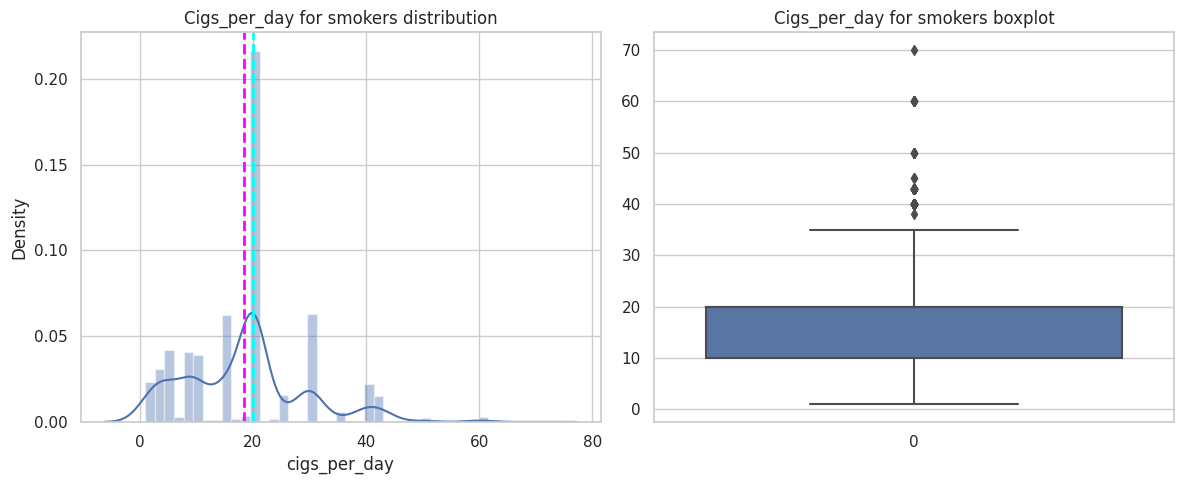

In [282]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Distribution of number of cigarettes per day for smokers (excluding non-smokers)
sns.distplot(clas[clas['is_smoking'] == 'YES']['cigs_per_day'], ax=axes[0])
axes[0].axvline(clas[clas['is_smoking'] == 'YES']['cigs_per_day'].mean(), color='magenta', linestyle='dashed', linewidth=2)
axes[0].axvline(clas[clas['is_smoking'] == 'YES']['cigs_per_day'].median(), color='cyan', linestyle='dashed', linewidth=2)
axes[0].set_title('Cigs_per_day for smokers distribution')

# Boxplot for the number of cigarettes per day for smokers (excluding non-smokers)
sns.boxplot(clas[clas['is_smoking'] == 'YES']['cigs_per_day'], ax=axes[1])
axes[1].set_title('Cigs_per_day for smokers boxplot')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

**Since the number of cigarettes smoked by the patients who smoke contains outliers, the missing values in ths cigs_per_day column can be imputed with its median value. Because median is not sensitive to outliers like mean.**

In [283]:
# Imputing the missing values in the cigs_per_day
clas['cigs_per_day'] = clas['cigs_per_day'].fillna(clas[clas['is_smoking']=='YES']['cigs_per_day'].median())

In [284]:
# Checking for any wrong entries where the patient is not a smoker
# and cigarettes per day above 0

clas[(clas['is_smoking']==0) & (clas['cigs_per_day']>0)]

Empty DataFrame
Columns: [age, education, sex, is_smoking, cigs_per_day, bp_meds, prevalent_stroke, prevalent_hyp, diabetes, total_cholesterol, systolic_bp, diastolic_bp, bmi, heart_rate, glucose, ten_year_chd]
Index: []

In [285]:
# Checking for any wrong entries where the patient is a smoker
# and cigarettes per day is 0

clas[(clas['is_smoking']==1) & (clas['cigs_per_day']==0)]

Empty DataFrame
Columns: [age, education, sex, is_smoking, cigs_per_day, bp_meds, prevalent_stroke, prevalent_hyp, diabetes, total_cholesterol, systolic_bp, diastolic_bp, bmi, heart_rate, glucose, ten_year_chd]
Index: []

**There are no errors in these columns.**

#### Missing value imputation in **total_cholestrol, bmi, heart_rate:**

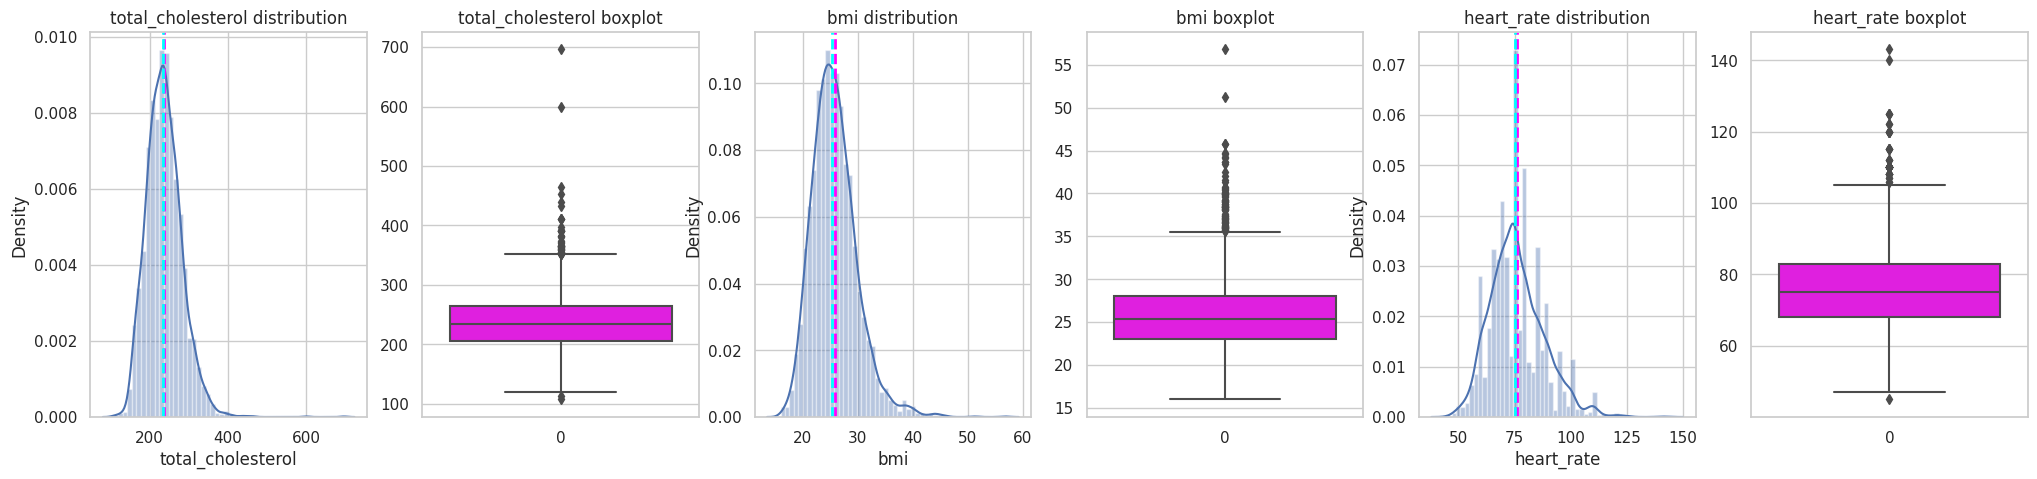

In [286]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with three subplots
fig, axes = plt.subplots(1, 6, figsize=(25, 5))

# Checking the distribution and boxplot for total_cholesterol, bmi, and heart_rate
variables = ['total_cholesterol', 'bmi', 'heart_rate']

for i, variable in enumerate(variables):
    # Distribution Plot
    sns.distplot(clas[variable], ax=axes[i * 2])
    axes[i * 2].axvline(clas[variable].mean(), color='magenta', linestyle='dashed', linewidth=2)
    axes[i * 2].axvline(clas[variable].median(), color='cyan', linestyle='dashed', linewidth=2)
    axes[i * 2].set_title(f'{variable} distribution')

    # Boxplot
    sns.boxplot(clas[variable], ax=axes[i * 2 + 1], color='magenta')
    axes[i * 2 + 1].set_title(f'{variable} boxplot')

plt.show()

**Since the above distribution plot and boxplot for total_cholestrol, bmi, and heart_rate columns shows that they are positively/rightward skewed, and also contains outliers.**

In [287]:
# Variables to loop through
variables = ['total_cholesterol', 'bmi', 'heart_rate']

# Loop through each variable and print mean and median
for var in variables:
    mean_val = clas[var].mean()
    median_val = clas[var].median()

    print(f"Mean and median for {var}: {mean_val}, {median_val}")

Mean and median for total_cholesterol: 237.07428400954655, 234.0
Mean and median for bmi: 25.7949644549763, 25.38
Mean and median for heart_rate: 75.97727943346119, 75.0


**The total_cholestrol, bmi, and heart_rate columns contain outliers. We can impute the missing values with its median.**

In [288]:
# Imputing missing values in the total_cholesterol, bmi, and heart_rate with their medain values because of outlier presence.
clas['total_cholesterol'] = clas['total_cholesterol'].fillna(clas['total_cholesterol'].median())
clas['bmi'] = clas['bmi'].fillna(clas['bmi'].median())
clas['heart_rate'] = clas['heart_rate'].fillna(clas['heart_rate'].median())

#### Missing values imputation in **glucose:**

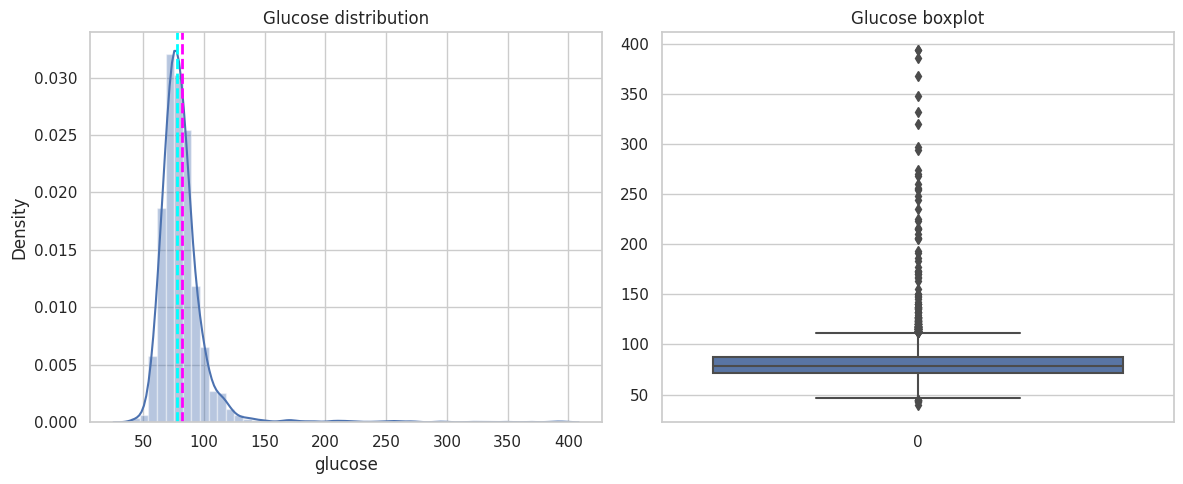

In [289]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Distribution of glucose
sns.distplot(clas['glucose'], ax=axes[0])
axes[0].axvline(clas['glucose'].mean(), color='magenta', linestyle='dashed', linewidth=2)
axes[0].axvline(clas['glucose'].median(), color='cyan', linestyle='dashed', linewidth=2)
axes[0].set_title('Glucose distribution')

# Visualizing Outliers in glucose
sns.boxplot(clas['glucose'], ax=axes[1])
axes[1].set_title('Glucose boxplot')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

**Since the above distribution plot and boxplot for glucose column shows that they are positively/rightward skewed, and also contains outliers.**

In [290]:
# Mean, median, and mode for glucose
clas.glucose.mean(),clas.glucose.median(),clas.glucose.mode()

(82.08651976668827,
 78.0,
 0    75.0
 Name: glucose, dtype: float64)

* The **distribution exhibits positive/rightward skewness and includes outliers**.
* The glucose column contains **304** missing values. **Opting to impute them with a singular mean or median value would introduce significant bias.**
* To mitigate this, an alternative approach is to utilize **a KNN imputer** for handling the missing values.
* In the context of **a time series dataset**, **interpolation** could have been employed as a method to impute missing values. Interpolation methods, such as linear or spline interpolation, take advantage of **trends or seasonality** patterns to estimate missing values based on the observed values.
* However, in the absence of temporal structure, other methods like KNN imputation may be more appropriate. **KNN imputation** considers the **similarity between data points** to impute missing values, making it a more data-driven approach.


In [291]:
# Separate numerical columns
continuous_var = clas.select_dtypes(include=['float64']).columns

# Apply KNNImputer to numerical columns
imputer = KNNImputer(n_neighbors=10)
numerical_imputed = imputer.fit_transform(clas[continuous_var])
clas[continuous_var] = pd.DataFrame(numerical_imputed, columns=continuous_var)

In [292]:
# mean, median, and mode for glucose after knn imputation
clas.glucose.mean(),clas.glucose.median(),clas.glucose.mode()

(82.04392330383482,
 78.0,
 0    75.0
 Name: glucose, dtype: float64)

**After KNN imputation, We can see that there is no massive change in the values of mean. And the values of median and mode remain the same.**

In [293]:
clas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3390 non-null   int64  
 1   education          3390 non-null   float64
 2   sex                3390 non-null   object 
 3   is_smoking         3390 non-null   object 
 4   cigs_per_day       3390 non-null   float64
 5   bp_meds            3390 non-null   float64
 6   prevalent_stroke   3390 non-null   int64  
 7   prevalent_hyp      3390 non-null   int64  
 8   diabetes           3390 non-null   int64  
 9   total_cholesterol  3390 non-null   float64
 10  systolic_bp        3390 non-null   float64
 11  diastolic_bp       3390 non-null   float64
 12  bmi                3390 non-null   float64
 13  heart_rate         3390 non-null   float64
 14  glucose            3390 non-null   float64
 15  ten_year_chd       3390 non-null   int64  
dtypes: float64(9), int64(5),

In [294]:
# changing datatypes
clas = clas.astype({'age': int,'education':int,'sex':object,'is_smoking':object,'cigs_per_day':int,
               'bp_meds':int,'prevalent_stroke':int,'prevalent_hyp':int,'diabetes':int,
               'total_cholesterol':float,'systolic_bp':float,'diastolic_bp':float,
               'bmi':float,'heart_rate':float,'glucose':float,'ten_year_chd':int})

In [295]:
# checking for missing values if any
clas.isna().sum().sum()

0

#### What all missing value imputation techniques have you used and why did you use those techniques?

* I have used median, mode and KNN imputation techniques to handle missing values in the dataset. I chose to use these techniques because they are appropriate for the nature of the data and the specific problem at hand.

For example:
* I used median imputation for numerical variables that were skewed, as it is a robust measure of central tendency that is not affected by outliers.

* I used mode imputation for categorical variables, as it is the most common value and can be a good estimate for missing values.

* I also used KNN imputation, which works by finding similar observations in the dataset and using their values to impute missing values. This technique can be useful when there are patterns or relationships in the data that can be leveraged to make more accurate imputations.

### 2. Handling Outliers

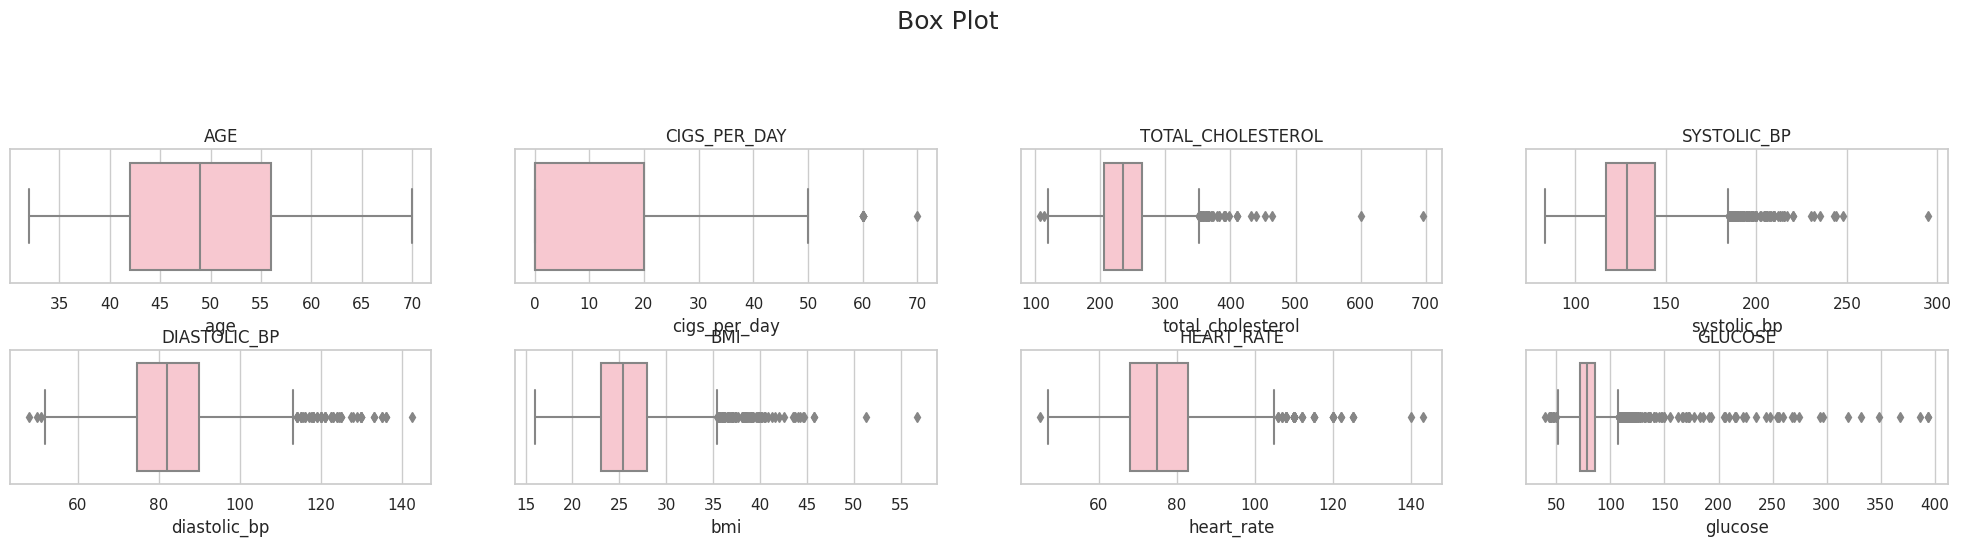

In [297]:
# Selecting continuous variables from the DataFrame
numerical_var= ['age', 'cigs_per_day', 'total_cholesterol', 'systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose']

# Create a new DataFrame with the selected columns
data_a = clas[numerical_var]

# Handling Outliers & Outlier treatments
# Create a new DataFrame with the selected columns
col_list = list(data_a.describe().columns)

# Find the outliers using boxplot
plt.figure(figsize=(25, 20))
plt.suptitle("Box Plot", fontsize=18, y=0.95)

for n, ticker in enumerate(col_list):
    ax = plt.subplot(8, 4, n + 1)
    plt.subplots_adjust(hspace=0.5, wspace=0.2)
    sns.boxplot(x=data_a[ticker], color='pink', ax=ax)

    # Chart formatting
    ax.set_title(ticker.upper())

In [298]:
# Removing outliers
for col in numerical_var:
  # Using IQR method to define the range of inliners:
  q1, q3, median = clas[col].quantile([0.25,0.75,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)

  # Replacing Outliers
  clas[col] = np.where(clas[col] > upper_limit, upper_limit,np.where(
                         clas[col] < lower_limit,lower_limit,clas[col]))

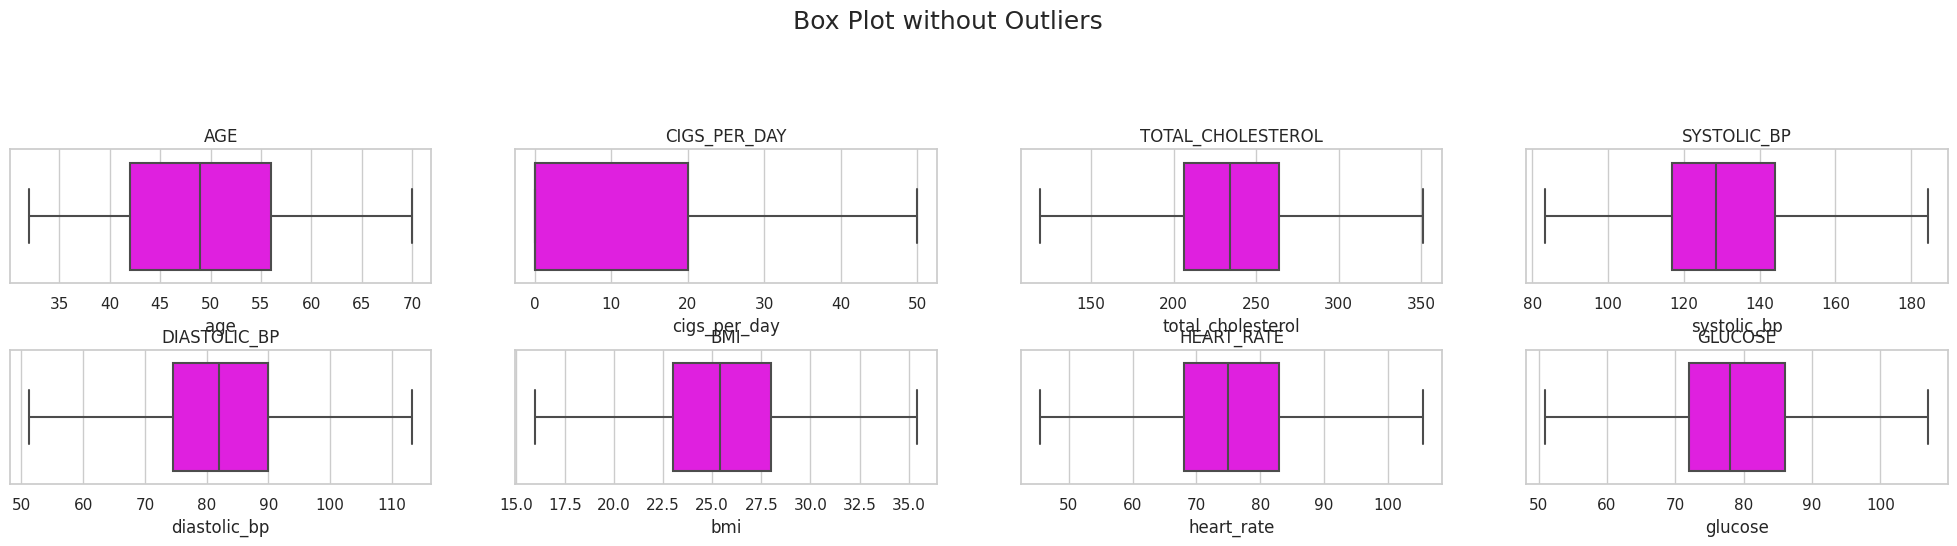

In [299]:
plt.figure(figsize=(25, 20))
plt.suptitle("Box Plot without Outliers", fontsize=18, y=0.95)
#plot the all figures in loop with boxplot
for n, ticker in enumerate(col_list):

    ax = plt.subplot(8, 4, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)

    sns.boxplot(x=clas[ticker],color='magenta',ax = ax)

    # chart formatting
    ax.set_title(ticker.upper())

##### What all outlier treatment techniques have you used and why did you use those techniques?

* Interquartile Range (IQR) Method:
Utilized the IQR method for identifying and handling outliers in the continuous columns of the dataset.
* Robust Outlier Detection:
Chose the IQR method due to its robust nature in outlier detection, unaffected by extreme values in the data.
* Calculation of IQR:
Calculated the IQR as the difference between the 75th and 25th percentiles of the data.
* Outlier Definition:
Defined outliers as values falling below the 25th percentile minus 1.5 times the IQR or above the 75th percentile plus 1.5 times the IQR.
* Objective Outlier Removal:
Applied the IQR method to identify and consistently remove outliers in a manner unaffected by extreme data points.

* The np.where() function is used to replace the outliers with the upper or lower limit values, depending on which side they fall.
* The np.where() function takes three arguments:
a condition, a value to return if the condition is True, and a value to return if the condition is False.
The function returns an array with the same shape as the input array, but with the values replaced according to the condition.

* A nested np.where() function to handle both upper and lower outliers.
* The outer np.where() function checks if the values in the column are greater than the upper limit,
and if so, it replaces them with the upper limit value.
* The inner np.where() function checks if the values in the column are less than the lower limit,
and if so, it replaces them with the lower limit value.
* Otherwise, it returns the original values in the column.
* The result is a new column with the outliers replaced by the limit values.

### 3. Categorical Encoding

In [302]:
# Encode your categorical columns

# Encoding the binary columns
clas['sex'] = np.where(clas['sex'] == 'M',1,0)
clas['is_smoking'] = np.where(clas['is_smoking'] == 'YES',1,0)

#clas = pd.get_dummies(clas, columns=['education'])
# Encode categorical variables
label_encoder = LabelEncoder()
clas['education'] = label_encoder.fit_transform(clas['education'].astype(str))

In [304]:
clas.head()

age  education  sex  is_smoking  cigs_per_day  bp_meds  prevalent_stroke  \
0  64.0          1    0           1           3.0        0                 0   
1  36.0          3    1           0           0.0        0                 0   
2  46.0          0    0           1          10.0        0                 0   
3  50.0          0    1           1          20.0        0                 0   
4  64.0          0    0           1          30.0        0                 0   

   prevalent_hyp  diabetes  total_cholesterol  systolic_bp  diastolic_bp  \
0              0         0              221.0        148.0          85.0   
1              1         0              212.0        168.0          98.0   
2              0         0              250.0        116.0          71.0   
3              1         0              233.0        158.0          88.0   
4              0         0              241.0        136.5          85.0   

     bmi  heart_rate  glucose  ten_year_chd  
0  25.38        90.0     80.0             1  
1  29.77        72.0     75.0             0  
2  20.35        88.0     94.0             0  
3  28.26        68.0     94.0             1  
4  26.42        70.0     77.0             0

In [305]:
clas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3390 non-null   float64
 1   education          3390 non-null   int64  
 2   sex                3390 non-null   int64  
 3   is_smoking         3390 non-null   int64  
 4   cigs_per_day       3390 non-null   float64
 5   bp_meds            3390 non-null   int64  
 6   prevalent_stroke   3390 non-null   int64  
 7   prevalent_hyp      3390 non-null   int64  
 8   diabetes           3390 non-null   int64  
 9   total_cholesterol  3390 non-null   float64
 10  systolic_bp        3390 non-null   float64
 11  diastolic_bp       3390 non-null   float64
 12  bmi                3390 non-null   float64
 13  heart_rate         3390 non-null   float64
 14  glucose            3390 non-null   float64
 15  ten_year_chd       3390 non-null   int64  
dtypes: float64(8), int64(8)


#### What all categorical encoding techniques have you used & why did you use those techniques?

**Binary Encoding:**
* Used for columns with binary values like 'sex' and 'is_smoking.'
* Replaced 'M' with 1 and other values with 0 for 'sex.'
* Replaced 'YES' with 1 and other values with 0 for 'is_smoking.'
* This encoding is suitable for columns with two distinct categories.

**Label Encoding:**
* Applied to the 'education' column.
* Used LabelEncoder to convert categorical values into numerical labels.
* Label encoding is appropriate for ordinal categorical variables where the order matters.
* Transformed categorical values into integer labels, allowing numerical representation for machine learning algorithms.

**One-Hot Encoding (commented out):**
* Not used in the provided code but mentioned in comments.
* One-hot encoding creates binary columns for each category in the 'education' column.
* Suitable for nominal categorical variables with no inherent order.
* Increases the dimensionality of the dataset but avoids introducing ordinal relationships that label encoding might imply.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [220]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [221]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [222]:
# Transform Your data

### 6. Data Scaling

In [223]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [224]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [225]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [226]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [227]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [228]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [229]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [230]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [231]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [232]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [233]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [234]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [235]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [236]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***